# imports

In [1]:
from tensorflow.keras import layers, optimizers, models, Sequential, initializers, constraints, regularizers, backend
import tensorflow as tf
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib
import seaborn as sns
sns.set_context('notebook',font_scale=1.15)

Using matplotlib backend: Qt5Agg


In [3]:
tf.__version__

'2.0.0-beta0'

kernel contraint that effectively implements one-to-one connections

# define feature selection layer

In [14]:
# all you need to create a mask matrix M, which is a NxN identity matrix
# and you can write a contraint like below
class DiagonalWeight(constraints.Constraint):
    """Constrains the weights to be diagonal.
    """
    def __call__(self, w):
        N = tf.shape(w)[-1]
        m = tf.eye(N)
        w = m*w
        return w

regularizer: L1 + time-dependent tanh

modified L0 loss: $\tilde L_0 = \alpha \sum_n |w_n+\beta|$, with $\beta=0.05$ here.

only one-to-one connections (=diagonal weight matrix): $w_{nk} = w_{n}\text{ if } $n=k$\text{ and 0 otherwise}$



In [15]:
class L1_tilde(regularizers.Regularizer):
    """Regularizer for ...
    """

    def __init__(self, normalization = 1000, alpha = .05):
        self.counter = 0
        self.normalization = normalization
        self.alpha = alpha

    def __call__(self, x):
        regularization = 0.
        prefactor = min(1,self.counter/self.normalization)
        regularization += backend.sum(backend.abs(x+0.05))
        self.counter += 1
        return self.alpha*regularization

In [16]:
class selection_layer(layers.Dense):
    def __init__(self, units, norm=1000, alpha=0.05):
        super(selection_layer, self).__init__(units, kernel_constraint=DiagonalWeight(),
                                        kernel_initializer = initializers.Ones(),
                                        kernel_regularizer= L1_tilde(alpha=alpha, normalization=norm),
                                        #bias_regularizer=constant_bias(),
                                        activation='relu',
                                        use_bias=False)

In [17]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_batch_end(self, batch, logs):
        weights = tf.linalg.tensor_diag_part((model.layers[0].weights[0]).numpy())
        weights_history.append(weights)

# test data

## most naive test

In [396]:
model = Sequential([selection_layer(5)])
model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [403]:
test_x = np.random.normal(size=(600,5))
test_y = np.concatenate((test_x[:,:4],np.random.normal(size = (600,1))), axis = -1)

In [406]:
model.fit(test_x, test_y, epochs = 300, verbose = 1)

Train on 600 samples
Epoch 1/300
600/600 [==============================] - 0s 43us/sample - loss: 0.3882
Epoch 2/300
600/600 [==============================] - 0s 51us/sample - loss: 0.3882
Epoch 3/300
600/600 [==============================] - 0s 32us/sample - loss: 0.3882
Epoch 4/300
600/600 [==============================] - 0s 37us/sample - loss: 0.3882
Epoch 5/300
600/600 [==============================] - 0s 28us/sample - loss: 0.3882
Epoch 6/300
600/600 [==============================] - 0s 44us/sample - loss: 0.3882
Epoch 7/300
600/600 [==============================] - 0s 39us/sample - loss: 0.3882
Epoch 8/300
600/600 [==============================] - 0s 39us/sample - loss: 0.3882
Epoch 9/300
600/600 [==============================] - 0s 48us/sample - loss: 0.3882
Epoch 10/300
600/600 [==============================] - 0s 45us/sample - loss: 0.3882
Epoch 11/300
600/600 [==============================] - 0s 49us/sample - loss: 0.3882
Epoch 12/300
600/600 [====================

600/600 [==============================] - 0s 50us/sample - loss: 0.3882
Epoch 97/300
600/600 [==============================] - 0s 52us/sample - loss: 0.3882
Epoch 98/300
600/600 [==============================] - 0s 52us/sample - loss: 0.3882
Epoch 99/300
600/600 [==============================] - 0s 49us/sample - loss: 0.3882
Epoch 100/300
600/600 [==============================] - 0s 54us/sample - loss: 0.3882
Epoch 101/300
600/600 [==============================] - 0s 52us/sample - loss: 0.3882
Epoch 102/300
600/600 [==============================] - 0s 49us/sample - loss: 0.3882
Epoch 103/300
600/600 [==============================] - 0s 53us/sample - loss: 0.3882
Epoch 104/300
600/600 [==============================] - 0s 57us/sample - loss: 0.3882
Epoch 105/300
600/600 [==============================] - 0s 49us/sample - loss: 0.3882
Epoch 106/300
600/600 [==============================] - 0s 51us/sample - loss: 0.3882
Epoch 107/300
600/600 [==============================] - 0s 

600/600 [==============================] - 0s 49us/sample - loss: 0.3882
Epoch 285/300
600/600 [==============================] - 0s 51us/sample - loss: 0.3882
Epoch 286/300
600/600 [==============================] - 0s 53us/sample - loss: 0.3882
Epoch 287/300
600/600 [==============================] - 0s 50us/sample - loss: 0.3882
Epoch 288/300
600/600 [==============================] - 0s 53us/sample - loss: 0.3882
Epoch 289/300
600/600 [==============================] - 0s 50us/sample - loss: 0.3882
Epoch 290/300
600/600 [==============================] - 0s 48us/sample - loss: 0.3882
Epoch 291/300
600/600 [==============================] - 0s 57us/sample - loss: 0.3882
Epoch 292/300
600/600 [==============================] - 0s 50us/sample - loss: 0.3882
Epoch 293/300
600/600 [==============================] - 0s 50us/sample - loss: 0.3882
Epoch 294/300
600/600 [==============================] - 0s 54us/sample - loss: 0.3882
Epoch 295/300
600/600 [==============================] - 

In [407]:
model.layers[0].weights

[<tf.Variable 'sequential_45/selection_layer_62/kernel:0' shape=(5, 5) dtype=float32, numpy=
 array([[ 0.8783788 ,  0.        ,  0.        ,  0.        , -0.        ],
        [ 0.        ,  0.8741574 ,  0.        , -0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.8655264 , -0.        ,  0.        ],
        [ 0.        , -0.        , -0.        ,  0.88217187,  0.        ],
        [ 0.        , -0.        , -0.        , -0.        , -0.0020455 ]],
       dtype=float32)>]

### train for different alpha

In [772]:
weights = np.array([])
r2s = np.array([])
for al in np.linspace(0.001, 2, 5):
    model = Sequential([selection_layer(units=X.shape[-1], alpha = al, norm=10000), layers.Dense(5, activation='relu'), layers.Dense(1)])
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=500)
    weights = np.append(weights,tf.linalg.tensor_diag_part(model.layers[0].weights[0]).numpy())
    r2s = np.append(r2s,r2_score(y_test,model.predict(X_test)))
weights = weights.reshape(-1,13)

Train on 400 samples
Epoch 1/500
400/400 [==============================] - 0s 348us/sample - loss: 8.6623
Epoch 2/500
400/400 [==============================] - 0s 49us/sample - loss: 1.2397
Epoch 3/500
400/400 [==============================] - 0s 61us/sample - loss: 1.2102
Epoch 4/500
400/400 [==============================] - 0s 59us/sample - loss: 1.1805
Epoch 5/500
400/400 [==============================] - 0s 58us/sample - loss: 1.1512
Epoch 6/500
400/400 [==============================] - 0s 47us/sample - loss: 1.1184
Epoch 7/500
400/400 [==============================] - 0s 57us/sample - loss: 1.0837
Epoch 8/500
400/400 [==============================] - 0s 57us/sample - loss: 1.0494
Epoch 9/500
400/400 [==============================] - 0s 57us/sample - loss: 1.0188
Epoch 10/500
400/400 [==============================] - 0s 61us/sample - loss: 0.9892
Epoch 11/500
400/400 [==============================] - 0s 54us/sample - loss: 0.9605
Epoch 12/500
400/400 [===================

400/400 [==============================] - 0s 62us/sample - loss: 0.4329
Epoch 97/500
400/400 [==============================] - 0s 59us/sample - loss: 0.4306
Epoch 98/500
400/400 [==============================] - 0s 62us/sample - loss: 0.4278
Epoch 99/500
400/400 [==============================] - 0s 67us/sample - loss: 0.4240
Epoch 100/500
400/400 [==============================] - 0s 60us/sample - loss: 0.4220
Epoch 101/500
400/400 [==============================] - 0s 57us/sample - loss: 0.4187
Epoch 102/500
400/400 [==============================] - 0s 70us/sample - loss: 0.4156
Epoch 103/500
400/400 [==============================] - 0s 50us/sample - loss: 0.4141
Epoch 104/500
400/400 [==============================] - 0s 56us/sample - loss: 0.4108
Epoch 105/500
400/400 [==============================] - 0s 63us/sample - loss: 0.4080
Epoch 106/500
400/400 [==============================] - 0s 62us/sample - loss: 0.4064
Epoch 107/500
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 57us/sample - loss: 0.2545
Epoch 285/500
400/400 [==============================] - 0s 59us/sample - loss: 0.2549
Epoch 286/500
400/400 [==============================] - 0s 56us/sample - loss: 0.2549
Epoch 287/500
400/400 [==============================] - 0s 59us/sample - loss: 0.2544
Epoch 288/500
400/400 [==============================] - 0s 58us/sample - loss: 0.2536
Epoch 289/500
400/400 [==============================] - 0s 69us/sample - loss: 0.2551
Epoch 290/500
400/400 [==============================] - 0s 59us/sample - loss: 0.2539
Epoch 291/500
400/400 [==============================] - 0s 60us/sample - loss: 0.2536
Epoch 292/500
400/400 [==============================] - 0s 60us/sample - loss: 0.2533
Epoch 293/500
400/400 [==============================] - 0s 54us/sample - loss: 0.2522
Epoch 294/500
400/400 [==============================] - 0s 60us/sample - loss: 0.2536
Epoch 295/500
400/400 [==============================] - 

400/400 [==============================] - 0s 67us/sample - loss: 0.2358
Epoch 473/500
400/400 [==============================] - 0s 60us/sample - loss: 0.2349
Epoch 474/500
400/400 [==============================] - 0s 56us/sample - loss: 0.2343
Epoch 475/500
400/400 [==============================] - 0s 50us/sample - loss: 0.2350
Epoch 476/500
400/400 [==============================] - 0s 56us/sample - loss: 0.2353
Epoch 477/500
400/400 [==============================] - 0s 62us/sample - loss: 0.2344
Epoch 478/500
400/400 [==============================] - 0s 56us/sample - loss: 0.2342
Epoch 479/500
400/400 [==============================] - 0s 63us/sample - loss: 0.2344
Epoch 480/500
400/400 [==============================] - 0s 64us/sample - loss: 0.2336
Epoch 481/500
400/400 [==============================] - 0s 65us/sample - loss: 0.2347
Epoch 482/500
400/400 [==============================] - 0s 63us/sample - loss: 0.2344
Epoch 483/500
400/400 [==============================] - 

Epoch 67/500
400/400 [==============================] - 0s 55us/sample - loss: 1.7089
Epoch 68/500
400/400 [==============================] - 0s 55us/sample - loss: 1.6409
Epoch 69/500
400/400 [==============================] - 0s 46us/sample - loss: 1.5738
Epoch 70/500
400/400 [==============================] - 0s 59us/sample - loss: 1.5074
Epoch 71/500
400/400 [==============================] - 0s 59us/sample - loss: 1.4435
Epoch 72/500
400/400 [==============================] - 0s 53us/sample - loss: 1.3812
Epoch 73/500
400/400 [==============================] - 0s 58us/sample - loss: 1.3210
Epoch 74/500
400/400 [==============================] - 0s 63us/sample - loss: 1.2649
Epoch 75/500
400/400 [==============================] - 0s 58us/sample - loss: 1.2110
Epoch 76/500
400/400 [==============================] - 0s 59us/sample - loss: 1.1577
Epoch 77/500
400/400 [==============================] - 0s 63us/sample - loss: 1.1123
Epoch 78/500
400/400 [==============================] 

400/400 [==============================] - 0s 54us/sample - loss: 0.6076
Epoch 256/500
400/400 [==============================] - 0s 61us/sample - loss: 0.6099
Epoch 257/500
400/400 [==============================] - 0s 57us/sample - loss: 0.6045
Epoch 258/500
400/400 [==============================] - 0s 56us/sample - loss: 0.6055
Epoch 259/500
400/400 [==============================] - 0s 60us/sample - loss: 0.6073
Epoch 260/500
400/400 [==============================] - 0s 63us/sample - loss: 0.6044
Epoch 261/500
400/400 [==============================] - 0s 64us/sample - loss: 0.6038
Epoch 262/500
400/400 [==============================] - 0s 64us/sample - loss: 0.6033
Epoch 263/500
400/400 [==============================] - 0s 52us/sample - loss: 0.5984
Epoch 264/500
400/400 [==============================] - 0s 60us/sample - loss: 0.6019
Epoch 265/500
400/400 [==============================] - 0s 49us/sample - loss: 0.5979
Epoch 266/500
400/400 [==============================] - 

400/400 [==============================] - 0s 44us/sample - loss: 0.5002
Epoch 444/500
400/400 [==============================] - 0s 59us/sample - loss: 0.4989
Epoch 445/500
400/400 [==============================] - 0s 60us/sample - loss: 0.4993
Epoch 446/500
400/400 [==============================] - 0s 61us/sample - loss: 0.4960
Epoch 447/500
400/400 [==============================] - 0s 66us/sample - loss: 0.5004
Epoch 448/500
400/400 [==============================] - 0s 64us/sample - loss: 0.4967
Epoch 449/500
400/400 [==============================] - 0s 62us/sample - loss: 0.4966
Epoch 450/500
400/400 [==============================] - 0s 52us/sample - loss: 0.4941
Epoch 451/500
400/400 [==============================] - 0s 58us/sample - loss: 0.4950
Epoch 452/500
400/400 [==============================] - 0s 54us/sample - loss: 0.4985
Epoch 453/500
400/400 [==============================] - 0s 62us/sample - loss: 0.4918
Epoch 454/500
400/400 [==============================] - 

400/400 [==============================] - 0s 59us/sample - loss: 0.9557
Epoch 133/500
400/400 [==============================] - 0s 66us/sample - loss: 0.9539
Epoch 134/500
400/400 [==============================] - 0s 63us/sample - loss: 0.9531
Epoch 135/500
400/400 [==============================] - 0s 55us/sample - loss: 0.9502
Epoch 136/500
400/400 [==============================] - 0s 60us/sample - loss: 0.9466
Epoch 137/500
400/400 [==============================] - 0s 63us/sample - loss: 0.9429
Epoch 138/500
400/400 [==============================] - 0s 63us/sample - loss: 0.9447
Epoch 139/500
400/400 [==============================] - 0s 71us/sample - loss: 0.9406
Epoch 140/500
400/400 [==============================] - 0s 71us/sample - loss: 0.9373
Epoch 141/500
400/400 [==============================] - 0s 50us/sample - loss: 0.9367
Epoch 142/500
400/400 [==============================] - 0s 52us/sample - loss: 0.9335
Epoch 143/500
400/400 [==============================] - 

400/400 [==============================] - 0s 53us/sample - loss: 0.6045
Epoch 321/500
400/400 [==============================] - 0s 36us/sample - loss: 0.6012
Epoch 322/500
400/400 [==============================] - 0s 51us/sample - loss: 0.6008
Epoch 323/500
400/400 [==============================] - 0s 48us/sample - loss: 0.6002
Epoch 324/500
400/400 [==============================] - 0s 58us/sample - loss: 0.6059
Epoch 325/500
400/400 [==============================] - 0s 56us/sample - loss: 0.6018
Epoch 326/500
400/400 [==============================] - 0s 60us/sample - loss: 0.6024
Epoch 327/500
400/400 [==============================] - 0s 62us/sample - loss: 0.5972
Epoch 328/500
400/400 [==============================] - 0s 48us/sample - loss: 0.5949
Epoch 329/500
400/400 [==============================] - 0s 55us/sample - loss: 0.6027
Epoch 330/500
400/400 [==============================] - 0s 62us/sample - loss: 0.5957
Epoch 331/500
400/400 [==============================] - 

400/400 [==============================] - 0s 58us/sample - loss: 18.3731
Epoch 9/500
400/400 [==============================] - 0s 59us/sample - loss: 18.1016
Epoch 10/500
400/400 [==============================] - 0s 58us/sample - loss: 17.8315
Epoch 11/500
400/400 [==============================] - 0s 52us/sample - loss: 17.5621
Epoch 12/500
400/400 [==============================] - 0s 62us/sample - loss: 17.2946
Epoch 13/500
400/400 [==============================] - 0s 62us/sample - loss: 17.0280
Epoch 14/500
400/400 [==============================] - 0s 62us/sample - loss: 16.7617
Epoch 15/500
400/400 [==============================] - 0s 45us/sample - loss: 16.4967
Epoch 16/500
400/400 [==============================] - 0s 43us/sample - loss: 16.2318
Epoch 17/500
400/400 [==============================] - 0s 54us/sample - loss: 15.9684
Epoch 18/500
400/400 [==============================] - 0s 56us/sample - loss: 15.7069
Epoch 19/500
400/400 [==============================] - 0

400/400 [==============================] - 0s 36us/sample - loss: 1.0257
Epoch 104/500
400/400 [==============================] - 0s 51us/sample - loss: 1.0254
Epoch 105/500
400/400 [==============================] - 0s 47us/sample - loss: 1.0248
Epoch 106/500
400/400 [==============================] - 0s 53us/sample - loss: 1.0252
Epoch 107/500
400/400 [==============================] - 0s 50us/sample - loss: 1.0258
Epoch 108/500
400/400 [==============================] - 0s 54us/sample - loss: 1.0245
Epoch 109/500
400/400 [==============================] - 0s 57us/sample - loss: 1.0271
Epoch 110/500
400/400 [==============================] - 0s 63us/sample - loss: 1.0246
Epoch 111/500
400/400 [==============================] - 0s 56us/sample - loss: 1.0252
Epoch 112/500
400/400 [==============================] - 0s 41us/sample - loss: 1.0247
Epoch 113/500
400/400 [==============================] - 0s 51us/sample - loss: 1.0260
Epoch 114/500
400/400 [==============================] - 

400/400 [==============================] - 0s 50us/sample - loss: 0.9345
Epoch 292/500
400/400 [==============================] - 0s 59us/sample - loss: 0.9374
Epoch 293/500
400/400 [==============================] - 0s 56us/sample - loss: 0.9309
Epoch 294/500
400/400 [==============================] - 0s 47us/sample - loss: 0.9314
Epoch 295/500
400/400 [==============================] - 0s 54us/sample - loss: 0.9328
Epoch 296/500
400/400 [==============================] - 0s 65us/sample - loss: 0.9308
Epoch 297/500
400/400 [==============================] - 0s 66us/sample - loss: 0.9319
Epoch 298/500
400/400 [==============================] - 0s 62us/sample - loss: 0.9238
Epoch 299/500
400/400 [==============================] - 0s 66us/sample - loss: 0.9249
Epoch 300/500
400/400 [==============================] - 0s 63us/sample - loss: 0.9229
Epoch 301/500
400/400 [==============================] - 0s 57us/sample - loss: 0.9223
Epoch 302/500
400/400 [==============================] - 

400/400 [==============================] - 0s 57us/sample - loss: 0.6546
Epoch 480/500
400/400 [==============================] - 0s 61us/sample - loss: 0.6500
Epoch 481/500
400/400 [==============================] - 0s 57us/sample - loss: 0.6539
Epoch 482/500
400/400 [==============================] - 0s 55us/sample - loss: 0.6423
Epoch 483/500
400/400 [==============================] - 0s 59us/sample - loss: 0.6458
Epoch 484/500
400/400 [==============================] - 0s 62us/sample - loss: 0.6542
Epoch 485/500
400/400 [==============================] - 0s 69us/sample - loss: 0.6468
Epoch 486/500
400/400 [==============================] - 0s 68us/sample - loss: 0.6445
Epoch 487/500
400/400 [==============================] - 0s 61us/sample - loss: 0.6356
Epoch 488/500
400/400 [==============================] - 0s 60us/sample - loss: 0.6479
Epoch 489/500
400/400 [==============================] - 0s 64us/sample - loss: 0.6505
Epoch 490/500
400/400 [==============================] - 

400/400 [==============================] - 0s 62us/sample - loss: 1.0278
Epoch 168/500
400/400 [==============================] - 0s 51us/sample - loss: 1.0275
Epoch 169/500
400/400 [==============================] - 0s 58us/sample - loss: 1.0274
Epoch 170/500
400/400 [==============================] - 0s 46us/sample - loss: 1.0269
Epoch 171/500
400/400 [==============================] - 0s 59us/sample - loss: 1.0277
Epoch 172/500
400/400 [==============================] - 0s 61us/sample - loss: 1.0282
Epoch 173/500
400/400 [==============================] - 0s 61us/sample - loss: 1.0282
Epoch 174/500
400/400 [==============================] - 0s 56us/sample - loss: 1.0284
Epoch 175/500
400/400 [==============================] - 0s 60us/sample - loss: 1.0279
Epoch 176/500
400/400 [==============================] - 0s 52us/sample - loss: 1.0283
Epoch 177/500
400/400 [==============================] - 0s 58us/sample - loss: 1.0283
Epoch 178/500
400/400 [==============================] - 

400/400 [==============================] - 0s 55us/sample - loss: 0.9918
Epoch 356/500
400/400 [==============================] - 0s 56us/sample - loss: 0.9931
Epoch 357/500
400/400 [==============================] - 0s 55us/sample - loss: 0.9899
Epoch 358/500
400/400 [==============================] - 0s 56us/sample - loss: 0.9884
Epoch 359/500
400/400 [==============================] - 0s 56us/sample - loss: 0.9910
Epoch 360/500
400/400 [==============================] - 0s 52us/sample - loss: 0.9898
Epoch 361/500
400/400 [==============================] - 0s 53us/sample - loss: 0.9872
Epoch 362/500
400/400 [==============================] - 0s 52us/sample - loss: 0.9922
Epoch 363/500
400/400 [==============================] - 0s 54us/sample - loss: 0.9888
Epoch 364/500
400/400 [==============================] - 0s 64us/sample - loss: 0.9841
Epoch 365/500
400/400 [==============================] - 0s 57us/sample - loss: 0.9825
Epoch 366/500
400/400 [==============================] - 

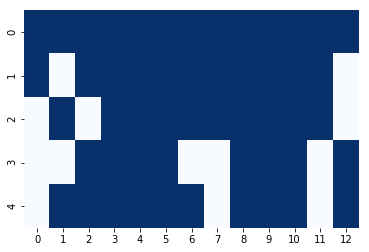

In [778]:
#plt.figure()
ax = sns.heatmap((weights>0), cmap='Blues', cbar=False,)

In [775]:
r2s

array([0.70451902, 0.66775074, 0.64500471, 0.62070525, 0.53477612])

## classification data (sklearn dummy data)

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples = 1200, n_informative=10,n_repeated=0, n_classes=3, class_sep=1., n_clusters_per_class=2, shuffle=False)

In [10]:
plt.figure()
plt.scatter(X[:, 1], X[:, 3],marker='o', c=y, s=25, edgecolor='k')
plt.show()

In [11]:
#y = (y-y.mean())/y.std()
minmax = preprocessing.MinMaxScaler(feature_range=(0,10))
minmax.fit(X)
X = minmax.transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
weights_history = []
loss = []
val_loss = []

num_alphas = 20
alpha_range = np.logspace(-2.4, 0.1, num_alphas)

weights = np.array([])
acc = np.array([])
for al in alpha_range:
    model = Sequential([selection_layer(units=X.shape[-1], alpha = al, norm=.5*100*int(800/32.)), layers.Dense(10, activation='relu'), layers.Dropout(.1), layers.Dense(3, activation='softmax')])
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
    hi = model.fit(X_train, tf.keras.utils.to_categorical(y_train), epochs=340, validation_split = 0.15, callbacks=[MyCallback()])
    weights = np.append(weights,tf.linalg.tensor_diag_part(model.layers[0].weights[0]).numpy())
    acc = np.append(acc, accuracy_score(y_test,model.predict_classes(X_test)))
    loss= np.append(loss, hi.history['loss'])
    val_loss = np.append(val_loss, hi.history['val_loss'])
weights = weights.reshape(-1,20)
weights_history = np.array(weights_history).reshape(num_alphas,-1,X.shape[-1])
loss = loss.reshape(num_alphas,-1)
val_loss = val_loss.reshape(num_alphas,-1)

W0618 12:04:55.159354 139813652932416 deprecation.py:323] From /home/herfurtht/miniconda3/envs/tf2/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 816 samples, validate on 144 samples
Epoch 1/340
816/816 [==============================] - 0s 476us/sample - loss: 2.1471 - val_loss: 1.4300
Epoch 2/340
816/816 [==============================] - 0s 87us/sample - loss: 1.3666 - val_loss: 1.2293
Epoch 3/340
816/816 [==============================] - 0s 68us/sample - loss: 1.2663 - val_loss: 1.1859
Epoch 4/340
816/816 [==============================] - 0s 85us/sample - loss: 1.2029 - val_loss: 1.1492
Epoch 5/340
816/816 [==============================] - 0s 85us/sample - loss: 1.1691 - val_loss: 1.1408
Epoch 6/340
816/816 [==============================] - 0s 94us/sample - loss: 1.1628 - val_loss: 1.1343
Epoch 7/340
816/816 [==============================] - 0s 94us/sample - loss: 1.1619 - val_loss: 1.1157
Epoch 8/340
816/816 [==============================] - 0s 92us/sample - loss: 1.1450 - val_loss: 1.1068
Epoch 9/340
816/816 [==============================] - 0s 97us/sample - loss: 1.1208 - val_loss: 1.1044
Epoch 10/340
816/

816/816 [==============================] - 0s 85us/sample - loss: 0.7541 - val_loss: 0.6716
Epoch 156/340
816/816 [==============================] - 0s 88us/sample - loss: 0.7458 - val_loss: 0.6750
Epoch 157/340
816/816 [==============================] - 0s 97us/sample - loss: 0.7709 - val_loss: 0.6721
Epoch 158/340
816/816 [==============================] - 0s 94us/sample - loss: 0.7443 - val_loss: 0.6909
Epoch 159/340
816/816 [==============================] - 0s 98us/sample - loss: 0.7616 - val_loss: 0.6610
Epoch 160/340
816/816 [==============================] - 0s 101us/sample - loss: 0.7613 - val_loss: 0.6750
Epoch 161/340
816/816 [==============================] - 0s 94us/sample - loss: 0.7621 - val_loss: 0.6785
Epoch 162/340
816/816 [==============================] - 0s 97us/sample - loss: 0.7476 - val_loss: 0.6653
Epoch 163/340
816/816 [==============================] - 0s 99us/sample - loss: 0.7306 - val_loss: 0.6713
Epoch 164/340
816/816 [==============================] - 0s

816/816 [==============================] - 0s 70us/sample - loss: 0.6858 - val_loss: 0.6006
Epoch 310/340
816/816 [==============================] - 0s 80us/sample - loss: 0.6458 - val_loss: 0.6071
Epoch 311/340
816/816 [==============================] - 0s 99us/sample - loss: 0.6552 - val_loss: 0.5961
Epoch 312/340
816/816 [==============================] - 0s 105us/sample - loss: 0.6587 - val_loss: 0.6148
Epoch 313/340
816/816 [==============================] - 0s 99us/sample - loss: 0.6575 - val_loss: 0.5984
Epoch 314/340
816/816 [==============================] - 0s 94us/sample - loss: 0.6463 - val_loss: 0.5905
Epoch 315/340
816/816 [==============================] - 0s 94us/sample - loss: 0.6676 - val_loss: 0.6092
Epoch 316/340
816/816 [==============================] - 0s 89us/sample - loss: 0.6766 - val_loss: 0.6193
Epoch 317/340
816/816 [==============================] - 0s 80us/sample - loss: 0.6700 - val_loss: 0.6089
Epoch 318/340
816/816 [==============================] - 0s

Epoch 124/340
816/816 [==============================] - 0s 99us/sample - loss: 0.8263 - val_loss: 0.7292
Epoch 125/340
816/816 [==============================] - 0s 85us/sample - loss: 0.8334 - val_loss: 0.7393
Epoch 126/340
816/816 [==============================] - 0s 82us/sample - loss: 0.8096 - val_loss: 0.7241
Epoch 127/340
816/816 [==============================] - 0s 96us/sample - loss: 0.8216 - val_loss: 0.7091
Epoch 128/340
816/816 [==============================] - 0s 88us/sample - loss: 0.8256 - val_loss: 0.7121
Epoch 129/340
816/816 [==============================] - 0s 101us/sample - loss: 0.8223 - val_loss: 0.7124
Epoch 130/340
816/816 [==============================] - 0s 100us/sample - loss: 0.8172 - val_loss: 0.7266
Epoch 131/340
816/816 [==============================] - 0s 82us/sample - loss: 0.8168 - val_loss: 0.7144
Epoch 132/340
816/816 [==============================] - 0s 90us/sample - loss: 0.8212 - val_loss: 0.7273
Epoch 133/340
816/816 [=====================

816/816 [==============================] - 0s 99us/sample - loss: 0.7910 - val_loss: 0.7125
Epoch 202/340
816/816 [==============================] - 0s 93us/sample - loss: 0.7784 - val_loss: 0.7177
Epoch 203/340
816/816 [==============================] - 0s 92us/sample - loss: 0.7995 - val_loss: 0.6928
Epoch 204/340
816/816 [==============================] - 0s 98us/sample - loss: 0.7937 - val_loss: 0.7247
Epoch 205/340
816/816 [==============================] - 0s 100us/sample - loss: 0.7961 - val_loss: 0.7119
Epoch 206/340
816/816 [==============================] - 0s 95us/sample - loss: 0.7832 - val_loss: 0.6959
Epoch 207/340
816/816 [==============================] - 0s 95us/sample - loss: 0.7788 - val_loss: 0.6964
Epoch 208/340
816/816 [==============================] - 0s 102us/sample - loss: 0.7984 - val_loss: 0.7104
Epoch 209/340
816/816 [==============================] - 0s 104us/sample - loss: 0.7788 - val_loss: 0.7084
Epoch 210/340
816/816 [==============================] - 

816/816 [==============================] - 0s 100us/sample - loss: 1.2714 - val_loss: 1.2550
Epoch 16/340
816/816 [==============================] - 0s 98us/sample - loss: 1.2459 - val_loss: 1.2346
Epoch 17/340
816/816 [==============================] - 0s 108us/sample - loss: 1.2538 - val_loss: 1.2245
Epoch 18/340
816/816 [==============================] - 0s 106us/sample - loss: 1.2479 - val_loss: 1.2143
Epoch 19/340
816/816 [==============================] - 0s 104us/sample - loss: 1.2309 - val_loss: 1.1959
Epoch 20/340
816/816 [==============================] - 0s 97us/sample - loss: 1.2193 - val_loss: 1.1771
Epoch 21/340
816/816 [==============================] - 0s 88us/sample - loss: 1.2079 - val_loss: 1.1646
Epoch 22/340
816/816 [==============================] - 0s 82us/sample - loss: 1.1925 - val_loss: 1.1499
Epoch 23/340
816/816 [==============================] - 0s 81us/sample - loss: 1.1906 - val_loss: 1.1519
Epoch 24/340
816/816 [==============================] - 0s 86us/

Epoch 93/340
816/816 [==============================] - 0s 97us/sample - loss: 0.9722 - val_loss: 0.8407
Epoch 94/340
816/816 [==============================] - 0s 101us/sample - loss: 0.9897 - val_loss: 0.8553
Epoch 95/340
816/816 [==============================] - 0s 98us/sample - loss: 0.9744 - val_loss: 0.8349
Epoch 96/340
816/816 [==============================] - 0s 93us/sample - loss: 0.9672 - val_loss: 0.8365
Epoch 97/340
816/816 [==============================] - 0s 97us/sample - loss: 0.9590 - val_loss: 0.8308
Epoch 98/340
816/816 [==============================] - 0s 102us/sample - loss: 0.9577 - val_loss: 0.8366
Epoch 99/340
816/816 [==============================] - 0s 97us/sample - loss: 0.9648 - val_loss: 0.8501
Epoch 100/340
816/816 [==============================] - 0s 101us/sample - loss: 0.9594 - val_loss: 0.8314
Epoch 101/340
816/816 [==============================] - 0s 101us/sample - loss: 0.9396 - val_loss: 0.8249
Epoch 102/340
816/816 [==========================

Epoch 170/340
816/816 [==============================] - 0s 96us/sample - loss: 0.8813 - val_loss: 0.7692
Epoch 171/340
816/816 [==============================] - 0s 100us/sample - loss: 0.8757 - val_loss: 0.7869
Epoch 172/340
816/816 [==============================] - 0s 98us/sample - loss: 0.8724 - val_loss: 0.7684
Epoch 173/340
816/816 [==============================] - 0s 101us/sample - loss: 0.8763 - val_loss: 0.7700
Epoch 174/340
816/816 [==============================] - 0s 101us/sample - loss: 0.8503 - val_loss: 0.7507
Epoch 175/340
816/816 [==============================] - 0s 99us/sample - loss: 0.8678 - val_loss: 0.7644
Epoch 176/340
816/816 [==============================] - 0s 93us/sample - loss: 0.8778 - val_loss: 0.7543
Epoch 177/340
816/816 [==============================] - 0s 100us/sample - loss: 0.8716 - val_loss: 0.7653
Epoch 178/340
816/816 [==============================] - 0s 96us/sample - loss: 0.8671 - val_loss: 0.7628
Epoch 179/340
816/816 [===================

Epoch 247/340
816/816 [==============================] - 0s 97us/sample - loss: 0.7729 - val_loss: 0.7191
Epoch 248/340
816/816 [==============================] - 0s 100us/sample - loss: 0.7827 - val_loss: 0.7100
Epoch 249/340
816/816 [==============================] - 0s 100us/sample - loss: 0.7890 - val_loss: 0.7141
Epoch 250/340
816/816 [==============================] - 0s 105us/sample - loss: 0.7699 - val_loss: 0.7012
Epoch 251/340
816/816 [==============================] - 0s 101us/sample - loss: 0.7950 - val_loss: 0.7058
Epoch 252/340
816/816 [==============================] - 0s 83us/sample - loss: 0.7734 - val_loss: 0.7096
Epoch 253/340
816/816 [==============================] - 0s 101us/sample - loss: 0.7825 - val_loss: 0.7140
Epoch 254/340
816/816 [==============================] - 0s 98us/sample - loss: 0.7766 - val_loss: 0.7028
Epoch 255/340
816/816 [==============================] - 0s 101us/sample - loss: 0.7540 - val_loss: 0.6990
Epoch 256/340
816/816 [=================

Epoch 324/340
816/816 [==============================] - 0s 99us/sample - loss: 0.7381 - val_loss: 0.6850
Epoch 325/340
816/816 [==============================] - 0s 96us/sample - loss: 0.7324 - val_loss: 0.6756
Epoch 326/340
816/816 [==============================] - 0s 102us/sample - loss: 0.7130 - val_loss: 0.6759
Epoch 327/340
816/816 [==============================] - 0s 103us/sample - loss: 0.7361 - val_loss: 0.6888
Epoch 328/340
816/816 [==============================] - 0s 101us/sample - loss: 0.7130 - val_loss: 0.6912
Epoch 329/340
816/816 [==============================] - 0s 103us/sample - loss: 0.6998 - val_loss: 0.6853
Epoch 330/340
816/816 [==============================] - 0s 100us/sample - loss: 0.7243 - val_loss: 0.6872
Epoch 331/340
816/816 [==============================] - 0s 97us/sample - loss: 0.7363 - val_loss: 0.6795
Epoch 332/340
816/816 [==============================] - 0s 92us/sample - loss: 0.7347 - val_loss: 0.6909
Epoch 333/340
816/816 [==================

816/816 [==============================] - 0s 101us/sample - loss: 1.0963 - val_loss: 1.0604
Epoch 62/340
816/816 [==============================] - 0s 102us/sample - loss: 1.0963 - val_loss: 1.0580
Epoch 63/340
816/816 [==============================] - 0s 101us/sample - loss: 1.0808 - val_loss: 1.0568
Epoch 64/340
816/816 [==============================] - 0s 100us/sample - loss: 1.0545 - val_loss: 1.0474
Epoch 65/340
816/816 [==============================] - 0s 98us/sample - loss: 1.0688 - val_loss: 1.0396
Epoch 66/340
816/816 [==============================] - 0s 102us/sample - loss: 1.0697 - val_loss: 1.0397
Epoch 67/340
816/816 [==============================] - 0s 98us/sample - loss: 1.0527 - val_loss: 1.0267
Epoch 68/340
816/816 [==============================] - 0s 104us/sample - loss: 1.0517 - val_loss: 1.0248
Epoch 69/340
816/816 [==============================] - 0s 103us/sample - loss: 1.0575 - val_loss: 1.0220
Epoch 70/340
816/816 [==============================] - 0s 97

Epoch 215/340
816/816 [==============================] - 0s 101us/sample - loss: 0.8506 - val_loss: 0.7847
Epoch 216/340
816/816 [==============================] - 0s 96us/sample - loss: 0.8743 - val_loss: 0.7884
Epoch 217/340
816/816 [==============================] - 0s 96us/sample - loss: 0.8674 - val_loss: 0.7998
Epoch 218/340
816/816 [==============================] - 0s 106us/sample - loss: 0.8748 - val_loss: 0.7916
Epoch 219/340
816/816 [==============================] - 0s 103us/sample - loss: 0.8860 - val_loss: 0.7897
Epoch 220/340
816/816 [==============================] - 0s 96us/sample - loss: 0.8394 - val_loss: 0.7861
Epoch 221/340
816/816 [==============================] - 0s 100us/sample - loss: 0.8629 - val_loss: 0.7833
Epoch 222/340
816/816 [==============================] - 0s 100us/sample - loss: 0.8568 - val_loss: 0.7929
Epoch 223/340
816/816 [==============================] - 0s 106us/sample - loss: 0.8602 - val_loss: 0.7831
Epoch 224/340
816/816 [=================

Epoch 292/340
816/816 [==============================] - 0s 77us/sample - loss: 0.8164 - val_loss: 0.7404
Epoch 293/340
816/816 [==============================] - 0s 95us/sample - loss: 0.7940 - val_loss: 0.7446
Epoch 294/340
816/816 [==============================] - 0s 101us/sample - loss: 0.8222 - val_loss: 0.7367
Epoch 295/340
816/816 [==============================] - 0s 103us/sample - loss: 0.8268 - val_loss: 0.7522
Epoch 296/340
816/816 [==============================] - 0s 102us/sample - loss: 0.8247 - val_loss: 0.7387
Epoch 297/340
816/816 [==============================] - 0s 96us/sample - loss: 0.8266 - val_loss: 0.7460
Epoch 298/340
816/816 [==============================] - 0s 102us/sample - loss: 0.7929 - val_loss: 0.7406
Epoch 299/340
816/816 [==============================] - 0s 104us/sample - loss: 0.8220 - val_loss: 0.7397
Epoch 300/340
816/816 [==============================] - 0s 102us/sample - loss: 0.8287 - val_loss: 0.7486
Epoch 301/340
816/816 [=================

Epoch 29/340
816/816 [==============================] - 0s 101us/sample - loss: 1.3432 - val_loss: 1.2271
Epoch 30/340
816/816 [==============================] - 0s 99us/sample - loss: 1.3206 - val_loss: 1.2067
Epoch 31/340
816/816 [==============================] - 0s 101us/sample - loss: 1.3087 - val_loss: 1.1945
Epoch 32/340
816/816 [==============================] - 0s 96us/sample - loss: 1.2957 - val_loss: 1.2199
Epoch 33/340
816/816 [==============================] - 0s 102us/sample - loss: 1.2996 - val_loss: 1.1792
Epoch 34/340
816/816 [==============================] - 0s 106us/sample - loss: 1.2985 - val_loss: 1.1786
Epoch 35/340
816/816 [==============================] - 0s 101us/sample - loss: 1.2845 - val_loss: 1.1631
Epoch 36/340
816/816 [==============================] - 0s 103us/sample - loss: 1.2768 - val_loss: 1.1520
Epoch 37/340
816/816 [==============================] - 0s 94us/sample - loss: 1.2848 - val_loss: 1.1486
Epoch 38/340
816/816 [===========================

816/816 [==============================] - 0s 93us/sample - loss: 0.9378 - val_loss: 0.8793
Epoch 184/340
816/816 [==============================] - 0s 99us/sample - loss: 0.9395 - val_loss: 0.9048
Epoch 185/340
816/816 [==============================] - 0s 99us/sample - loss: 0.9363 - val_loss: 0.8864
Epoch 186/340
816/816 [==============================] - 0s 101us/sample - loss: 0.9320 - val_loss: 0.8766
Epoch 187/340
816/816 [==============================] - 0s 97us/sample - loss: 0.9173 - val_loss: 0.8807
Epoch 188/340
816/816 [==============================] - 0s 96us/sample - loss: 0.9475 - val_loss: 0.8704
Epoch 189/340
816/816 [==============================] - 0s 100us/sample - loss: 0.9487 - val_loss: 0.8798
Epoch 190/340
816/816 [==============================] - 0s 98us/sample - loss: 0.9092 - val_loss: 0.8668
Epoch 191/340
816/816 [==============================] - 0s 100us/sample - loss: 0.9352 - val_loss: 0.8713
Epoch 192/340
816/816 [==============================] - 

816/816 [==============================] - 0s 96us/sample - loss: 0.8656 - val_loss: 0.8196
Epoch 338/340
816/816 [==============================] - 0s 96us/sample - loss: 0.8795 - val_loss: 0.8184
Epoch 339/340
816/816 [==============================] - 0s 97us/sample - loss: 0.8744 - val_loss: 0.8190
Epoch 340/340
816/816 [==============================] - 0s 94us/sample - loss: 0.8665 - val_loss: 0.8168
Train on 816 samples, validate on 144 samples
Epoch 1/340
816/816 [==============================] - 0s 402us/sample - loss: 3.7826 - val_loss: 2.5854
Epoch 2/340
816/816 [==============================] - 0s 81us/sample - loss: 2.1546 - val_loss: 2.0631
Epoch 3/340
816/816 [==============================] - 0s 86us/sample - loss: 1.8902 - val_loss: 1.8957
Epoch 4/340
816/816 [==============================] - 0s 95us/sample - loss: 1.8356 - val_loss: 1.8484
Epoch 5/340
816/816 [==============================] - 0s 100us/sample - loss: 1.8191 - val_loss: 1.8252
Epoch 6/340
816/816 [=

816/816 [==============================] - 0s 99us/sample - loss: 1.1157 - val_loss: 1.0949
Epoch 152/340
816/816 [==============================] - 0s 101us/sample - loss: 1.1122 - val_loss: 1.0810
Epoch 153/340
816/816 [==============================] - 0s 101us/sample - loss: 1.1118 - val_loss: 1.0787
Epoch 154/340
816/816 [==============================] - 0s 92us/sample - loss: 1.1170 - val_loss: 1.0848
Epoch 155/340
816/816 [==============================] - 0s 102us/sample - loss: 1.1232 - val_loss: 1.0798
Epoch 156/340
816/816 [==============================] - 0s 88us/sample - loss: 1.1043 - val_loss: 1.0643
Epoch 157/340
816/816 [==============================] - 0s 102us/sample - loss: 1.1071 - val_loss: 1.0680
Epoch 158/340
816/816 [==============================] - 0s 103us/sample - loss: 1.1109 - val_loss: 1.0622
Epoch 159/340
816/816 [==============================] - 0s 99us/sample - loss: 1.0947 - val_loss: 1.0653
Epoch 160/340
816/816 [==============================] 

816/816 [==============================] - 0s 96us/sample - loss: 1.0498 - val_loss: 1.0122
Epoch 229/340
816/816 [==============================] - 0s 90us/sample - loss: 1.0407 - val_loss: 1.0242
Epoch 230/340
816/816 [==============================] - 0s 100us/sample - loss: 1.0207 - val_loss: 1.0158
Epoch 231/340
816/816 [==============================] - 0s 98us/sample - loss: 1.0500 - val_loss: 1.0243
Epoch 232/340
816/816 [==============================] - 0s 105us/sample - loss: 1.0308 - val_loss: 1.0159
Epoch 233/340
816/816 [==============================] - 0s 100us/sample - loss: 1.0398 - val_loss: 1.0140
Epoch 234/340
816/816 [==============================] - 0s 102us/sample - loss: 1.0157 - val_loss: 1.0055
Epoch 235/340
816/816 [==============================] - 0s 99us/sample - loss: 1.0209 - val_loss: 1.0021
Epoch 236/340
816/816 [==============================] - 0s 103us/sample - loss: 1.0426 - val_loss: 1.0028
Epoch 237/340
816/816 [==============================] 

816/816 [==============================] - 0s 100us/sample - loss: 0.9942 - val_loss: 0.9776
Epoch 306/340
816/816 [==============================] - 0s 100us/sample - loss: 0.9863 - val_loss: 0.9609
Epoch 307/340
816/816 [==============================] - 0s 98us/sample - loss: 0.9961 - val_loss: 0.9604
Epoch 308/340
816/816 [==============================] - 0s 98us/sample - loss: 0.9981 - val_loss: 0.9677
Epoch 309/340
816/816 [==============================] - 0s 101us/sample - loss: 0.9771 - val_loss: 0.9587
Epoch 310/340
816/816 [==============================] - 0s 97us/sample - loss: 1.0037 - val_loss: 0.9661
Epoch 311/340
816/816 [==============================] - 0s 98us/sample - loss: 0.9831 - val_loss: 0.9613
Epoch 312/340
816/816 [==============================] - 0s 98us/sample - loss: 0.9975 - val_loss: 0.9557
Epoch 313/340
816/816 [==============================] - 0s 103us/sample - loss: 0.9837 - val_loss: 0.9697
Epoch 314/340
816/816 [==============================] -

816/816 [==============================] - 0s 101us/sample - loss: 1.2836 - val_loss: 1.1818
Epoch 120/340
816/816 [==============================] - 0s 94us/sample - loss: 1.2698 - val_loss: 1.1903
Epoch 121/340
816/816 [==============================] - 0s 94us/sample - loss: 1.2827 - val_loss: 1.1788
Epoch 122/340
816/816 [==============================] - 0s 106us/sample - loss: 1.2660 - val_loss: 1.1825
Epoch 123/340
816/816 [==============================] - 0s 101us/sample - loss: 1.2764 - val_loss: 1.1826
Epoch 124/340
816/816 [==============================] - 0s 95us/sample - loss: 1.2702 - val_loss: 1.1716
Epoch 125/340
816/816 [==============================] - 0s 98us/sample - loss: 1.2797 - val_loss: 1.1722
Epoch 126/340
816/816 [==============================] - 0s 102us/sample - loss: 1.2659 - val_loss: 1.1713
Epoch 127/340
816/816 [==============================] - 0s 102us/sample - loss: 1.2414 - val_loss: 1.1620
Epoch 128/340
816/816 [==============================] 

816/816 [==============================] - 0s 101us/sample - loss: 1.1578 - val_loss: 1.0781
Epoch 197/340
816/816 [==============================] - 0s 103us/sample - loss: 1.1613 - val_loss: 1.0681
Epoch 198/340
816/816 [==============================] - 0s 100us/sample - loss: 1.1457 - val_loss: 1.0880
Epoch 199/340
816/816 [==============================] - 0s 100us/sample - loss: 1.1594 - val_loss: 1.0750
Epoch 200/340
816/816 [==============================] - 0s 103us/sample - loss: 1.1594 - val_loss: 1.0727
Epoch 201/340
816/816 [==============================] - 0s 101us/sample - loss: 1.1729 - val_loss: 1.0660
Epoch 202/340
816/816 [==============================] - 0s 104us/sample - loss: 1.1566 - val_loss: 1.0680
Epoch 203/340
816/816 [==============================] - 0s 96us/sample - loss: 1.1565 - val_loss: 1.0678
Epoch 204/340
816/816 [==============================] - 0s 103us/sample - loss: 1.1531 - val_loss: 1.0667
Epoch 205/340
816/816 [=============================

816/816 [==============================] - 0s 102us/sample - loss: 1.0972 - val_loss: 1.0254
Epoch 274/340
816/816 [==============================] - 0s 96us/sample - loss: 1.1018 - val_loss: 1.0261
Epoch 275/340
816/816 [==============================] - 0s 99us/sample - loss: 1.1165 - val_loss: 1.0228
Epoch 276/340
816/816 [==============================] - 0s 103us/sample - loss: 1.0861 - val_loss: 1.0203
Epoch 277/340
816/816 [==============================] - 0s 102us/sample - loss: 1.0974 - val_loss: 1.0207
Epoch 278/340
816/816 [==============================] - 0s 100us/sample - loss: 1.0913 - val_loss: 1.0076
Epoch 279/340
816/816 [==============================] - 0s 101us/sample - loss: 1.1031 - val_loss: 1.0119
Epoch 280/340
816/816 [==============================] - 0s 101us/sample - loss: 1.0965 - val_loss: 1.0072
Epoch 281/340
816/816 [==============================] - 0s 101us/sample - loss: 1.1011 - val_loss: 1.0122
Epoch 282/340
816/816 [==============================

Epoch 87/340
816/816 [==============================] - 0s 82us/sample - loss: 1.6117 - val_loss: 1.5201
Epoch 88/340
816/816 [==============================] - 0s 101us/sample - loss: 1.6189 - val_loss: 1.5225
Epoch 89/340
816/816 [==============================] - 0s 103us/sample - loss: 1.6215 - val_loss: 1.5208
Epoch 90/340
816/816 [==============================] - 0s 95us/sample - loss: 1.6130 - val_loss: 1.5087
Epoch 91/340
816/816 [==============================] - 0s 102us/sample - loss: 1.6069 - val_loss: 1.5196
Epoch 92/340
816/816 [==============================] - 0s 98us/sample - loss: 1.6021 - val_loss: 1.5091
Epoch 93/340
816/816 [==============================] - 0s 95us/sample - loss: 1.6029 - val_loss: 1.5068
Epoch 94/340
816/816 [==============================] - 0s 101us/sample - loss: 1.5850 - val_loss: 1.4983
Epoch 95/340
816/816 [==============================] - 0s 98us/sample - loss: 1.6054 - val_loss: 1.4965
Epoch 96/340
816/816 [=============================

Epoch 164/340
816/816 [==============================] - 0s 101us/sample - loss: 1.4810 - val_loss: 1.3748
Epoch 165/340
816/816 [==============================] - 0s 101us/sample - loss: 1.4850 - val_loss: 1.3811
Epoch 166/340
816/816 [==============================] - 0s 93us/sample - loss: 1.4855 - val_loss: 1.3845
Epoch 167/340
816/816 [==============================] - 0s 99us/sample - loss: 1.4839 - val_loss: 1.3810
Epoch 168/340
816/816 [==============================] - 0s 102us/sample - loss: 1.4882 - val_loss: 1.3733
Epoch 169/340
816/816 [==============================] - 0s 96us/sample - loss: 1.4724 - val_loss: 1.3706
Epoch 170/340
816/816 [==============================] - 0s 101us/sample - loss: 1.4779 - val_loss: 1.3722
Epoch 171/340
816/816 [==============================] - 0s 104us/sample - loss: 1.4898 - val_loss: 1.3757
Epoch 172/340
816/816 [==============================] - 0s 102us/sample - loss: 1.4673 - val_loss: 1.3690
Epoch 173/340
816/816 [=================

Epoch 241/340
816/816 [==============================] - 0s 101us/sample - loss: 1.4286 - val_loss: 1.3171
Epoch 242/340
816/816 [==============================] - 0s 97us/sample - loss: 1.4260 - val_loss: 1.3141
Epoch 243/340
816/816 [==============================] - 0s 102us/sample - loss: 1.4141 - val_loss: 1.3192
Epoch 244/340
816/816 [==============================] - 0s 98us/sample - loss: 1.4280 - val_loss: 1.3122
Epoch 245/340
816/816 [==============================] - 0s 101us/sample - loss: 1.4313 - val_loss: 1.3291
Epoch 246/340
816/816 [==============================] - 0s 100us/sample - loss: 1.4356 - val_loss: 1.3139
Epoch 247/340
816/816 [==============================] - 0s 92us/sample - loss: 1.4364 - val_loss: 1.3122
Epoch 248/340
816/816 [==============================] - 0s 102us/sample - loss: 1.4188 - val_loss: 1.3163
Epoch 249/340
816/816 [==============================] - 0s 99us/sample - loss: 1.4210 - val_loss: 1.3113
Epoch 250/340
816/816 [==================

Epoch 318/340
816/816 [==============================] - 0s 100us/sample - loss: 1.3833 - val_loss: 1.2894
Epoch 319/340
816/816 [==============================] - 0s 100us/sample - loss: 1.3706 - val_loss: 1.2979
Epoch 320/340
816/816 [==============================] - 0s 102us/sample - loss: 1.3807 - val_loss: 1.2861
Epoch 321/340
816/816 [==============================] - 0s 98us/sample - loss: 1.3942 - val_loss: 1.3045
Epoch 322/340
816/816 [==============================] - 0s 90us/sample - loss: 1.3969 - val_loss: 1.2985
Epoch 323/340
816/816 [==============================] - 0s 91us/sample - loss: 1.4009 - val_loss: 1.2833
Epoch 324/340
816/816 [==============================] - 0s 97us/sample - loss: 1.3827 - val_loss: 1.2982
Epoch 325/340
816/816 [==============================] - 0s 95us/sample - loss: 1.3868 - val_loss: 1.2856
Epoch 326/340
816/816 [==============================] - 0s 86us/sample - loss: 1.3753 - val_loss: 1.2830
Epoch 327/340
816/816 [====================

816/816 [==============================] - 0s 105us/sample - loss: 1.6897 - val_loss: 1.6313
Epoch 133/340
816/816 [==============================] - 0s 100us/sample - loss: 1.6743 - val_loss: 1.6261
Epoch 134/340
816/816 [==============================] - 0s 96us/sample - loss: 1.6927 - val_loss: 1.6363
Epoch 135/340
816/816 [==============================] - 0s 100us/sample - loss: 1.7023 - val_loss: 1.6285
Epoch 136/340
816/816 [==============================] - 0s 102us/sample - loss: 1.6881 - val_loss: 1.6274
Epoch 137/340
816/816 [==============================] - 0s 102us/sample - loss: 1.6889 - val_loss: 1.6245
Epoch 138/340
816/816 [==============================] - 0s 103us/sample - loss: 1.6790 - val_loss: 1.6263
Epoch 139/340
816/816 [==============================] - 0s 99us/sample - loss: 1.6780 - val_loss: 1.6237
Epoch 140/340
816/816 [==============================] - 0s 93us/sample - loss: 1.6847 - val_loss: 1.6160
Epoch 141/340
816/816 [==============================]

816/816 [==============================] - 0s 101us/sample - loss: 1.6152 - val_loss: 1.5549
Epoch 210/340
816/816 [==============================] - 0s 101us/sample - loss: 1.6182 - val_loss: 1.5479
Epoch 211/340
816/816 [==============================] - 0s 96us/sample - loss: 1.6189 - val_loss: 1.5701
Epoch 212/340
816/816 [==============================] - 0s 97us/sample - loss: 1.6192 - val_loss: 1.5468
Epoch 213/340
816/816 [==============================] - 0s 96us/sample - loss: 1.6164 - val_loss: 1.5605
Epoch 214/340
816/816 [==============================] - 0s 97us/sample - loss: 1.6116 - val_loss: 1.5629
Epoch 215/340
816/816 [==============================] - 0s 101us/sample - loss: 1.6171 - val_loss: 1.5620
Epoch 216/340
816/816 [==============================] - 0s 100us/sample - loss: 1.6069 - val_loss: 1.5443
Epoch 217/340
816/816 [==============================] - 0s 99us/sample - loss: 1.6037 - val_loss: 1.5418
Epoch 218/340
816/816 [==============================] -

Epoch 23/340
816/816 [==============================] - 0s 99us/sample - loss: 2.9014 - val_loss: 2.8462
Epoch 24/340
816/816 [==============================] - 0s 103us/sample - loss: 2.8953 - val_loss: 2.8271
Epoch 25/340
816/816 [==============================] - 0s 100us/sample - loss: 2.8431 - val_loss: 2.7934
Epoch 26/340
816/816 [==============================] - 0s 104us/sample - loss: 2.8345 - val_loss: 2.7710
Epoch 27/340
816/816 [==============================] - 0s 100us/sample - loss: 2.8261 - val_loss: 2.7498
Epoch 28/340
816/816 [==============================] - 0s 101us/sample - loss: 2.8042 - val_loss: 2.7303
Epoch 29/340
816/816 [==============================] - 0s 103us/sample - loss: 2.7776 - val_loss: 2.7121
Epoch 30/340
816/816 [==============================] - 0s 101us/sample - loss: 2.7558 - val_loss: 2.6821
Epoch 31/340
816/816 [==============================] - 0s 97us/sample - loss: 2.7229 - val_loss: 2.6575
Epoch 32/340
816/816 [==========================

Epoch 177/340
816/816 [==============================] - 0s 105us/sample - loss: 1.9406 - val_loss: 1.8655
Epoch 178/340
816/816 [==============================] - 0s 105us/sample - loss: 1.9480 - val_loss: 1.8547
Epoch 179/340
816/816 [==============================] - 0s 107us/sample - loss: 1.9668 - val_loss: 1.8795
Epoch 180/340
816/816 [==============================] - 0s 100us/sample - loss: 1.9591 - val_loss: 1.8631
Epoch 181/340
816/816 [==============================] - 0s 104us/sample - loss: 1.9470 - val_loss: 1.8590
Epoch 182/340
816/816 [==============================] - 0s 103us/sample - loss: 1.9510 - val_loss: 1.8692
Epoch 183/340
816/816 [==============================] - 0s 100us/sample - loss: 1.9413 - val_loss: 1.8620
Epoch 184/340
816/816 [==============================] - 0s 85us/sample - loss: 1.9460 - val_loss: 1.8602
Epoch 185/340
816/816 [==============================] - 0s 99us/sample - loss: 1.9445 - val_loss: 1.8600
Epoch 186/340
816/816 [================

Epoch 254/340
816/816 [==============================] - 0s 99us/sample - loss: 1.8890 - val_loss: 1.8007
Epoch 255/340
816/816 [==============================] - 0s 100us/sample - loss: 1.8929 - val_loss: 1.8039
Epoch 256/340
816/816 [==============================] - 0s 98us/sample - loss: 1.8767 - val_loss: 1.8083
Epoch 257/340
816/816 [==============================] - 0s 101us/sample - loss: 1.9002 - val_loss: 1.8033
Epoch 258/340
816/816 [==============================] - 0s 101us/sample - loss: 1.8747 - val_loss: 1.7952
Epoch 259/340
816/816 [==============================] - 0s 99us/sample - loss: 1.8709 - val_loss: 1.7992
Epoch 260/340
816/816 [==============================] - 0s 101us/sample - loss: 1.8875 - val_loss: 1.8084
Epoch 261/340
816/816 [==============================] - 0s 99us/sample - loss: 1.8777 - val_loss: 1.7976
Epoch 262/340
816/816 [==============================] - 0s 99us/sample - loss: 1.8744 - val_loss: 1.8070
Epoch 263/340
816/816 [===================

Epoch 331/340
816/816 [==============================] - 0s 98us/sample - loss: 1.8404 - val_loss: 1.7650
Epoch 332/340
816/816 [==============================] - 0s 104us/sample - loss: 1.8442 - val_loss: 1.7708
Epoch 333/340
816/816 [==============================] - 0s 97us/sample - loss: 1.8447 - val_loss: 1.7670
Epoch 334/340
816/816 [==============================] - 0s 102us/sample - loss: 1.8507 - val_loss: 1.7711
Epoch 335/340
816/816 [==============================] - 0s 100us/sample - loss: 1.8634 - val_loss: 1.7741
Epoch 336/340
816/816 [==============================] - 0s 95us/sample - loss: 1.8342 - val_loss: 1.7732
Epoch 337/340
816/816 [==============================] - 0s 97us/sample - loss: 1.8434 - val_loss: 1.7633
Epoch 338/340
816/816 [==============================] - 0s 101us/sample - loss: 1.8551 - val_loss: 1.7624
Epoch 339/340
816/816 [==============================] - 0s 73us/sample - loss: 1.8538 - val_loss: 1.7579
Epoch 340/340
816/816 [===================

816/816 [==============================] - 0s 93us/sample - loss: 2.5082 - val_loss: 2.5345
Epoch 146/340
816/816 [==============================] - 0s 98us/sample - loss: 2.5047 - val_loss: 2.5347
Epoch 147/340
816/816 [==============================] - 0s 101us/sample - loss: 2.5125 - val_loss: 2.5315
Epoch 148/340
816/816 [==============================] - 0s 98us/sample - loss: 2.4994 - val_loss: 2.5341
Epoch 149/340
816/816 [==============================] - 0s 90us/sample - loss: 2.4918 - val_loss: 2.5317
Epoch 150/340
816/816 [==============================] - 0s 93us/sample - loss: 2.5066 - val_loss: 2.5266
Epoch 151/340
816/816 [==============================] - 0s 96us/sample - loss: 2.5022 - val_loss: 2.5317
Epoch 152/340
816/816 [==============================] - 0s 100us/sample - loss: 2.5006 - val_loss: 2.5248
Epoch 153/340
816/816 [==============================] - 0s 87us/sample - loss: 2.5056 - val_loss: 2.5298
Epoch 154/340
816/816 [==============================] - 0

816/816 [==============================] - 0s 89us/sample - loss: 2.4402 - val_loss: 2.4802
Epoch 300/340
816/816 [==============================] - 0s 95us/sample - loss: 2.4410 - val_loss: 2.4698
Epoch 301/340
816/816 [==============================] - 0s 98us/sample - loss: 2.4359 - val_loss: 2.4623
Epoch 302/340
816/816 [==============================] - 0s 99us/sample - loss: 2.4341 - val_loss: 2.4691
Epoch 303/340
816/816 [==============================] - 0s 97us/sample - loss: 2.4346 - val_loss: 2.4596
Epoch 304/340
816/816 [==============================] - 0s 97us/sample - loss: 2.4381 - val_loss: 2.4602
Epoch 305/340
816/816 [==============================] - 0s 102us/sample - loss: 2.4429 - val_loss: 2.4601
Epoch 306/340
816/816 [==============================] - 0s 102us/sample - loss: 2.4401 - val_loss: 2.4757
Epoch 307/340
816/816 [==============================] - 0s 101us/sample - loss: 2.4373 - val_loss: 2.4639
Epoch 308/340
816/816 [==============================] - 

816/816 [==============================] - 0s 102us/sample - loss: 3.8544 - val_loss: 3.7761
Epoch 37/340
816/816 [==============================] - 0s 99us/sample - loss: 3.8175 - val_loss: 3.7230
Epoch 38/340
816/816 [==============================] - 0s 90us/sample - loss: 3.7943 - val_loss: 3.6893
Epoch 39/340
816/816 [==============================] - 0s 98us/sample - loss: 3.7502 - val_loss: 3.6554
Epoch 40/340
816/816 [==============================] - 0s 103us/sample - loss: 3.7320 - val_loss: 3.6174
Epoch 41/340
816/816 [==============================] - 0s 100us/sample - loss: 3.6796 - val_loss: 3.5833
Epoch 42/340
816/816 [==============================] - 0s 100us/sample - loss: 3.6437 - val_loss: 3.5489
Epoch 43/340
816/816 [==============================] - 0s 99us/sample - loss: 3.6006 - val_loss: 3.5124
Epoch 44/340
816/816 [==============================] - 0s 99us/sample - loss: 3.5832 - val_loss: 3.4998
Epoch 45/340
816/816 [==============================] - 0s 99us/

816/816 [==============================] - 0s 96us/sample - loss: 2.9493 - val_loss: 2.8282
Epoch 191/340
816/816 [==============================] - 0s 99us/sample - loss: 2.9226 - val_loss: 2.8340
Epoch 192/340
816/816 [==============================] - 0s 103us/sample - loss: 2.9186 - val_loss: 2.8211
Epoch 193/340
816/816 [==============================] - 0s 103us/sample - loss: 2.9256 - val_loss: 2.8216
Epoch 194/340
816/816 [==============================] - 0s 108us/sample - loss: 2.9356 - val_loss: 2.8212
Epoch 195/340
816/816 [==============================] - 0s 98us/sample - loss: 2.9185 - val_loss: 2.8293
Epoch 196/340
816/816 [==============================] - 0s 104us/sample - loss: 2.9160 - val_loss: 2.8169
Epoch 197/340
816/816 [==============================] - 0s 104us/sample - loss: 2.9143 - val_loss: 2.8167
Epoch 198/340
816/816 [==============================] - 0s 99us/sample - loss: 2.9198 - val_loss: 2.8254
Epoch 199/340
816/816 [==============================] 

816/816 [==============================] - 0s 102us/sample - loss: 2.8891 - val_loss: 2.7783
Epoch 268/340
816/816 [==============================] - 0s 96us/sample - loss: 2.8748 - val_loss: 2.7803
Epoch 269/340
816/816 [==============================] - 0s 87us/sample - loss: 2.8826 - val_loss: 2.7753
Epoch 270/340
816/816 [==============================] - 0s 99us/sample - loss: 2.8735 - val_loss: 2.7820
Epoch 271/340
816/816 [==============================] - 0s 103us/sample - loss: 2.8880 - val_loss: 2.7810
Epoch 272/340
816/816 [==============================] - 0s 98us/sample - loss: 2.8867 - val_loss: 2.7794
Epoch 273/340
816/816 [==============================] - 0s 98us/sample - loss: 2.8844 - val_loss: 2.7834
Epoch 274/340
816/816 [==============================] - 0s 103us/sample - loss: 2.8771 - val_loss: 2.7754
Epoch 275/340
816/816 [==============================] - 0s 101us/sample - loss: 2.8718 - val_loss: 2.7796
Epoch 276/340
816/816 [==============================] -

Epoch 81/340
816/816 [==============================] - 0s 82us/sample - loss: 3.8877 - val_loss: 3.8093
Epoch 82/340
816/816 [==============================] - 0s 77us/sample - loss: 3.8863 - val_loss: 3.8055
Epoch 83/340
816/816 [==============================] - 0s 97us/sample - loss: 3.8697 - val_loss: 3.7997
Epoch 84/340
816/816 [==============================] - 0s 97us/sample - loss: 3.8781 - val_loss: 3.7970
Epoch 85/340
816/816 [==============================] - 0s 97us/sample - loss: 3.8730 - val_loss: 3.8053
Epoch 86/340
816/816 [==============================] - 0s 96us/sample - loss: 3.8727 - val_loss: 3.7978
Epoch 87/340
816/816 [==============================] - 0s 82us/sample - loss: 3.8682 - val_loss: 3.7886
Epoch 88/340
816/816 [==============================] - 0s 82us/sample - loss: 3.8618 - val_loss: 3.7816
Epoch 89/340
816/816 [==============================] - 0s 80us/sample - loss: 3.8613 - val_loss: 3.7845
Epoch 90/340
816/816 [==============================] -

816/816 [==============================] - 0s 99us/sample - loss: 3.7103 - val_loss: 3.6130
Epoch 236/340
816/816 [==============================] - 0s 83us/sample - loss: 3.7122 - val_loss: 3.6222
Epoch 237/340
816/816 [==============================] - 0s 98us/sample - loss: 3.7064 - val_loss: 3.6076
Epoch 238/340
816/816 [==============================] - 0s 96us/sample - loss: 3.7109 - val_loss: 3.6136
Epoch 239/340
816/816 [==============================] - 0s 99us/sample - loss: 3.7111 - val_loss: 3.6101
Epoch 240/340
816/816 [==============================] - 0s 99us/sample - loss: 3.7076 - val_loss: 3.6249
Epoch 241/340
816/816 [==============================] - 0s 101us/sample - loss: 3.7159 - val_loss: 3.6100
Epoch 242/340
816/816 [==============================] - 0s 97us/sample - loss: 3.7031 - val_loss: 3.6262
Epoch 243/340
816/816 [==============================] - 0s 100us/sample - loss: 3.7005 - val_loss: 3.6150
Epoch 244/340
816/816 [==============================] - 0

816/816 [==============================] - 0s 100us/sample - loss: 5.0755 - val_loss: 5.0481
Epoch 50/340
816/816 [==============================] - 0s 95us/sample - loss: 5.0668 - val_loss: 5.0385
Epoch 51/340
816/816 [==============================] - 0s 100us/sample - loss: 5.0510 - val_loss: 5.0257
Epoch 52/340
816/816 [==============================] - 0s 101us/sample - loss: 5.0473 - val_loss: 5.0151
Epoch 53/340
816/816 [==============================] - 0s 101us/sample - loss: 5.0427 - val_loss: 5.0120
Epoch 54/340
816/816 [==============================] - 0s 97us/sample - loss: 5.0365 - val_loss: 5.0078
Epoch 55/340
816/816 [==============================] - 0s 99us/sample - loss: 5.0293 - val_loss: 5.0012
Epoch 56/340
816/816 [==============================] - 0s 97us/sample - loss: 5.0222 - val_loss: 4.9905
Epoch 57/340
816/816 [==============================] - 0s 101us/sample - loss: 5.0217 - val_loss: 4.9861
Epoch 58/340
816/816 [==============================] - 0s 102u

816/816 [==============================] - 0s 92us/sample - loss: 4.8284 - val_loss: 4.6890
Epoch 204/340
816/816 [==============================] - 0s 103us/sample - loss: 4.8263 - val_loss: 4.6847
Epoch 205/340
816/816 [==============================] - 0s 105us/sample - loss: 4.8199 - val_loss: 4.6856
Epoch 206/340
816/816 [==============================] - 0s 98us/sample - loss: 4.8174 - val_loss: 4.6785
Epoch 207/340
816/816 [==============================] - 0s 98us/sample - loss: 4.8217 - val_loss: 4.6758
Epoch 208/340
816/816 [==============================] - 0s 100us/sample - loss: 4.8110 - val_loss: 4.6730
Epoch 209/340
816/816 [==============================] - 0s 99us/sample - loss: 4.8191 - val_loss: 4.6796
Epoch 210/340
816/816 [==============================] - 0s 100us/sample - loss: 4.8217 - val_loss: 4.6850
Epoch 211/340
816/816 [==============================] - 0s 97us/sample - loss: 4.8250 - val_loss: 4.6741
Epoch 212/340
816/816 [==============================] -

816/816 [==============================] - 0s 95us/sample - loss: 10.0286 - val_loss: 9.8979
Epoch 17/340
816/816 [==============================] - 0s 92us/sample - loss: 9.8724 - val_loss: 9.7644
Epoch 18/340
816/816 [==============================] - 0s 99us/sample - loss: 9.7380 - val_loss: 9.6080
Epoch 19/340
816/816 [==============================] - 0s 102us/sample - loss: 9.5943 - val_loss: 9.4626
Epoch 20/340
816/816 [==============================] - 0s 103us/sample - loss: 9.4448 - val_loss: 9.3181
Epoch 21/340
816/816 [==============================] - 0s 101us/sample - loss: 9.3122 - val_loss: 9.1828
Epoch 22/340
816/816 [==============================] - 0s 99us/sample - loss: 9.1703 - val_loss: 9.0401
Epoch 23/340
816/816 [==============================] - 0s 94us/sample - loss: 9.0277 - val_loss: 8.8942
Epoch 24/340
816/816 [==============================] - 0s 97us/sample - loss: 8.8765 - val_loss: 8.7526
Epoch 25/340
816/816 [==============================] - 0s 95us/

Epoch 94/340
816/816 [==============================] - 0s 98us/sample - loss: 6.2666 - val_loss: 6.2063
Epoch 95/340
816/816 [==============================] - 0s 100us/sample - loss: 6.2750 - val_loss: 6.2115
Epoch 96/340
816/816 [==============================] - 0s 98us/sample - loss: 6.2762 - val_loss: 6.2459
Epoch 97/340
816/816 [==============================] - 0s 100us/sample - loss: 6.2819 - val_loss: 6.2044
Epoch 98/340
816/816 [==============================] - 0s 100us/sample - loss: 6.2661 - val_loss: 6.2129
Epoch 99/340
816/816 [==============================] - 0s 103us/sample - loss: 6.2673 - val_loss: 6.2145
Epoch 100/340
816/816 [==============================] - 0s 101us/sample - loss: 6.2592 - val_loss: 6.1964
Epoch 101/340
816/816 [==============================] - 0s 98us/sample - loss: 6.2651 - val_loss: 6.1946
Epoch 102/340
816/816 [==============================] - 0s 98us/sample - loss: 6.2605 - val_loss: 6.1981
Epoch 103/340
816/816 [========================

816/816 [==============================] - 0s 100us/sample - loss: 6.1953 - val_loss: 6.1088
Epoch 172/340
816/816 [==============================] - 0s 101us/sample - loss: 6.1954 - val_loss: 6.1042
Epoch 173/340
816/816 [==============================] - 0s 99us/sample - loss: 6.2037 - val_loss: 6.1135
Epoch 174/340
816/816 [==============================] - 0s 97us/sample - loss: 6.1991 - val_loss: 6.1031
Epoch 175/340
816/816 [==============================] - 0s 99us/sample - loss: 6.1973 - val_loss: 6.1104
Epoch 176/340
816/816 [==============================] - 0s 99us/sample - loss: 6.1954 - val_loss: 6.1035
Epoch 177/340
816/816 [==============================] - 0s 97us/sample - loss: 6.1902 - val_loss: 6.1029
Epoch 178/340
816/816 [==============================] - 0s 89us/sample - loss: 6.1964 - val_loss: 6.1182
Epoch 179/340
816/816 [==============================] - 0s 106us/sample - loss: 6.1878 - val_loss: 6.0997
Epoch 180/340
816/816 [==============================] - 

816/816 [==============================] - 0s 98us/sample - loss: 6.1601 - val_loss: 6.0379
Epoch 326/340
816/816 [==============================] - 0s 99us/sample - loss: 6.1507 - val_loss: 6.0334
Epoch 327/340
816/816 [==============================] - 0s 102us/sample - loss: 6.1485 - val_loss: 6.0382
Epoch 328/340
816/816 [==============================] - 0s 100us/sample - loss: 6.1430 - val_loss: 6.0418
Epoch 329/340
816/816 [==============================] - 0s 94us/sample - loss: 6.1378 - val_loss: 6.0353
Epoch 330/340
816/816 [==============================] - 0s 98us/sample - loss: 6.1388 - val_loss: 6.0317
Epoch 331/340
816/816 [==============================] - 0s 96us/sample - loss: 6.1434 - val_loss: 6.0396
Epoch 332/340
816/816 [==============================] - 0s 99us/sample - loss: 6.1412 - val_loss: 6.0316
Epoch 333/340
816/816 [==============================] - 0s 94us/sample - loss: 6.1453 - val_loss: 6.0486
Epoch 334/340
816/816 [==============================] - 0

816/816 [==============================] - 0s 91us/sample - loss: 8.1277 - val_loss: 8.0149
Epoch 139/340
816/816 [==============================] - 0s 100us/sample - loss: 8.1409 - val_loss: 8.0079
Epoch 140/340
816/816 [==============================] - 0s 101us/sample - loss: 8.1386 - val_loss: 8.0039
Epoch 141/340
816/816 [==============================] - 0s 105us/sample - loss: 8.1352 - val_loss: 8.0063
Epoch 142/340
816/816 [==============================] - 0s 101us/sample - loss: 8.1343 - val_loss: 8.0070
Epoch 143/340
816/816 [==============================] - 0s 99us/sample - loss: 8.1327 - val_loss: 8.0013
Epoch 144/340
816/816 [==============================] - 0s 98us/sample - loss: 8.1280 - val_loss: 8.0037
Epoch 145/340
816/816 [==============================] - 0s 101us/sample - loss: 8.1329 - val_loss: 8.0234
Epoch 146/340
816/816 [==============================] - 0s 100us/sample - loss: 8.1328 - val_loss: 7.9983
Epoch 147/340
816/816 [==============================]

Epoch 215/340
816/816 [==============================] - 0s 99us/sample - loss: 8.1093 - val_loss: 7.9673
Epoch 216/340
816/816 [==============================] - 0s 102us/sample - loss: 8.1214 - val_loss: 7.9675
Epoch 217/340
816/816 [==============================] - 0s 104us/sample - loss: 8.1132 - val_loss: 7.9681
Epoch 218/340
816/816 [==============================] - 0s 105us/sample - loss: 8.1149 - val_loss: 7.9680
Epoch 219/340
816/816 [==============================] - 0s 101us/sample - loss: 8.1222 - val_loss: 7.9831
Epoch 220/340
816/816 [==============================] - 0s 102us/sample - loss: 8.1118 - val_loss: 7.9811
Epoch 221/340
816/816 [==============================] - 0s 96us/sample - loss: 8.1186 - val_loss: 7.9681
Epoch 222/340
816/816 [==============================] - 0s 102us/sample - loss: 8.1149 - val_loss: 7.9784
Epoch 223/340
816/816 [==============================] - 0s 100us/sample - loss: 8.1177 - val_loss: 7.9732
Epoch 224/340
816/816 [================

Epoch 292/340
816/816 [==============================] - 0s 101us/sample - loss: 8.1075 - val_loss: 7.9629
Epoch 293/340
816/816 [==============================] - 0s 99us/sample - loss: 8.1134 - val_loss: 7.9543
Epoch 294/340
816/816 [==============================] - 0s 103us/sample - loss: 8.1057 - val_loss: 7.9575
Epoch 295/340
816/816 [==============================] - 0s 101us/sample - loss: 8.1106 - val_loss: 7.9732
Epoch 296/340
816/816 [==============================] - 0s 99us/sample - loss: 8.1107 - val_loss: 7.9525
Epoch 297/340
816/816 [==============================] - 0s 100us/sample - loss: 8.1131 - val_loss: 7.9533
Epoch 298/340
816/816 [==============================] - 0s 99us/sample - loss: 8.1169 - val_loss: 7.9524
Epoch 299/340
816/816 [==============================] - 0s 98us/sample - loss: 8.1096 - val_loss: 7.9547
Epoch 300/340
816/816 [==============================] - 0s 88us/sample - loss: 8.1106 - val_loss: 7.9599
Epoch 301/340
816/816 [===================

816/816 [==============================] - 0s 102us/sample - loss: 10.6921 - val_loss: 10.6166
Epoch 105/340
816/816 [==============================] - 0s 94us/sample - loss: 10.6987 - val_loss: 10.6225
Epoch 106/340
816/816 [==============================] - 0s 103us/sample - loss: 10.7040 - val_loss: 10.6123
Epoch 107/340
816/816 [==============================] - 0s 102us/sample - loss: 10.7014 - val_loss: 10.6129
Epoch 108/340
816/816 [==============================] - 0s 100us/sample - loss: 10.6974 - val_loss: 10.6155
Epoch 109/340
816/816 [==============================] - 0s 97us/sample - loss: 10.6923 - val_loss: 10.6120
Epoch 110/340
816/816 [==============================] - 0s 99us/sample - loss: 10.6909 - val_loss: 10.6267
Epoch 111/340
816/816 [==============================] - 0s 99us/sample - loss: 10.6961 - val_loss: 10.6229
Epoch 112/340
816/816 [==============================] - 0s 101us/sample - loss: 10.7032 - val_loss: 10.6128
Epoch 113/340
816/816 [==============

816/816 [==============================] - 0s 96us/sample - loss: 10.6256 - val_loss: 10.5445
Epoch 255/340
816/816 [==============================] - 0s 88us/sample - loss: 10.6319 - val_loss: 10.5532
Epoch 256/340
816/816 [==============================] - 0s 103us/sample - loss: 10.6221 - val_loss: 10.5325
Epoch 257/340
816/816 [==============================] - 0s 101us/sample - loss: 10.6308 - val_loss: 10.5566
Epoch 258/340
816/816 [==============================] - 0s 102us/sample - loss: 10.6414 - val_loss: 10.5492
Epoch 259/340
816/816 [==============================] - 0s 96us/sample - loss: 10.6260 - val_loss: 10.5293
Epoch 260/340
816/816 [==============================] - 0s 96us/sample - loss: 10.6237 - val_loss: 10.5307
Epoch 261/340
816/816 [==============================] - 0s 105us/sample - loss: 10.6401 - val_loss: 10.5529
Epoch 262/340
816/816 [==============================] - 0s 102us/sample - loss: 10.6355 - val_loss: 10.5275
Epoch 263/340
816/816 [==============

Epoch 65/340
816/816 [==============================] - 0s 101us/sample - loss: 14.1807 - val_loss: 14.1645
Epoch 66/340
816/816 [==============================] - 0s 101us/sample - loss: 14.1828 - val_loss: 14.1614
Epoch 67/340
816/816 [==============================] - 0s 99us/sample - loss: 14.1807 - val_loss: 14.1597
Epoch 68/340
816/816 [==============================] - 0s 104us/sample - loss: 14.1804 - val_loss: 14.1583
Epoch 69/340
816/816 [==============================] - 0s 98us/sample - loss: 14.1806 - val_loss: 14.1563
Epoch 70/340
816/816 [==============================] - 0s 98us/sample - loss: 14.1766 - val_loss: 14.1536
Epoch 71/340
816/816 [==============================] - 0s 102us/sample - loss: 14.1765 - val_loss: 14.1512
Epoch 72/340
816/816 [==============================] - 0s 103us/sample - loss: 14.1781 - val_loss: 14.1509
Epoch 73/340
816/816 [==============================] - 0s 100us/sample - loss: 14.1755 - val_loss: 14.1451
Epoch 74/340
816/816 [=========

Epoch 141/340
816/816 [==============================] - 0s 103us/sample - loss: 14.1273 - val_loss: 14.0273
Epoch 142/340
816/816 [==============================] - 0s 104us/sample - loss: 14.1268 - val_loss: 14.0433
Epoch 143/340
816/816 [==============================] - 0s 92us/sample - loss: 14.1351 - val_loss: 14.0305
Epoch 144/340
816/816 [==============================] - 0s 91us/sample - loss: 14.1311 - val_loss: 14.0295
Epoch 145/340
816/816 [==============================] - 0s 102us/sample - loss: 14.1355 - val_loss: 14.0368
Epoch 146/340
816/816 [==============================] - 0s 99us/sample - loss: 14.1260 - val_loss: 14.0288
Epoch 147/340
816/816 [==============================] - 0s 98us/sample - loss: 14.1284 - val_loss: 14.0328
Epoch 148/340
816/816 [==============================] - 0s 104us/sample - loss: 14.1282 - val_loss: 14.0247
Epoch 149/340
816/816 [==============================] - 0s 101us/sample - loss: 14.1316 - val_loss: 14.0367
Epoch 150/340
816/816 [

816/816 [==============================] - 0s 101us/sample - loss: 14.1135 - val_loss: 14.0070
Epoch 292/340
816/816 [==============================] - 0s 99us/sample - loss: 14.1094 - val_loss: 13.9972
Epoch 293/340
816/816 [==============================] - 0s 96us/sample - loss: 14.1129 - val_loss: 14.0259
Epoch 294/340
816/816 [==============================] - 0s 99us/sample - loss: 14.1165 - val_loss: 13.9966
Epoch 295/340
816/816 [==============================] - 0s 102us/sample - loss: 14.1078 - val_loss: 14.0254
Epoch 296/340
816/816 [==============================] - 0s 97us/sample - loss: 14.1173 - val_loss: 14.0462
Epoch 297/340
816/816 [==============================] - 0s 96us/sample - loss: 14.1122 - val_loss: 14.0214
Epoch 298/340
816/816 [==============================] - 0s 100us/sample - loss: 14.1131 - val_loss: 14.0008
Epoch 299/340
816/816 [==============================] - 0s 100us/sample - loss: 14.1092 - val_loss: 14.0300
Epoch 300/340
816/816 [===============

816/816 [==============================] - 0s 101us/sample - loss: 18.7755 - val_loss: 18.7738
Epoch 103/340
816/816 [==============================] - 0s 98us/sample - loss: 18.7755 - val_loss: 18.7738
Epoch 104/340
816/816 [==============================] - 0s 100us/sample - loss: 18.7753 - val_loss: 18.7737
Epoch 105/340
816/816 [==============================] - 0s 102us/sample - loss: 18.7754 - val_loss: 18.7737
Epoch 106/340
816/816 [==============================] - 0s 101us/sample - loss: 18.7756 - val_loss: 18.7737
Epoch 107/340
816/816 [==============================] - 0s 99us/sample - loss: 18.7757 - val_loss: 18.7737
Epoch 108/340
816/816 [==============================] - 0s 106us/sample - loss: 18.7750 - val_loss: 18.7738
Epoch 109/340
816/816 [==============================] - 0s 102us/sample - loss: 18.7756 - val_loss: 18.7738
Epoch 110/340
816/816 [==============================] - 0s 102us/sample - loss: 18.7756 - val_loss: 18.7737
Epoch 111/340
816/816 [============

816/816 [==============================] - 0s 102us/sample - loss: 18.7753 - val_loss: 18.7739
Epoch 253/340
816/816 [==============================] - 0s 95us/sample - loss: 18.7751 - val_loss: 18.7739
Epoch 254/340
816/816 [==============================] - 0s 105us/sample - loss: 18.7753 - val_loss: 18.7739
Epoch 255/340
816/816 [==============================] - 0s 102us/sample - loss: 18.7754 - val_loss: 18.7738
Epoch 256/340
816/816 [==============================] - 0s 97us/sample - loss: 18.7753 - val_loss: 18.7738
Epoch 257/340
816/816 [==============================] - 0s 92us/sample - loss: 18.7754 - val_loss: 18.7738
Epoch 258/340
816/816 [==============================] - 0s 100us/sample - loss: 18.7753 - val_loss: 18.7738
Epoch 259/340
816/816 [==============================] - 0s 101us/sample - loss: 18.7751 - val_loss: 18.7739
Epoch 260/340
816/816 [==============================] - 0s 97us/sample - loss: 18.7753 - val_loss: 18.7739
Epoch 261/340
816/816 [==============

Epoch 63/340
816/816 [==============================] - 0s 98us/sample - loss: 25.0310 - val_loss: 25.0295
Epoch 64/340
816/816 [==============================] - 0s 103us/sample - loss: 25.0308 - val_loss: 25.0296
Epoch 65/340
816/816 [==============================] - 0s 98us/sample - loss: 25.0301 - val_loss: 25.0294
Epoch 66/340
816/816 [==============================] - 0s 90us/sample - loss: 25.0299 - val_loss: 25.0294
Epoch 67/340
816/816 [==============================] - 0s 98us/sample - loss: 25.0311 - val_loss: 25.0294
Epoch 68/340
816/816 [==============================] - 0s 105us/sample - loss: 25.0311 - val_loss: 25.0293
Epoch 69/340
816/816 [==============================] - 0s 101us/sample - loss: 25.0313 - val_loss: 25.0294
Epoch 70/340
816/816 [==============================] - 0s 103us/sample - loss: 25.0319 - val_loss: 25.0292
Epoch 71/340
816/816 [==============================] - 0s 104us/sample - loss: 25.0316 - val_loss: 25.0292
Epoch 72/340
816/816 [==========

Epoch 139/340
816/816 [==============================] - 0s 97us/sample - loss: 25.0305 - val_loss: 25.0293
Epoch 140/340
816/816 [==============================] - 0s 99us/sample - loss: 25.0311 - val_loss: 25.0294
Epoch 141/340
816/816 [==============================] - 0s 101us/sample - loss: 25.0309 - val_loss: 25.0292
Epoch 142/340
816/816 [==============================] - 0s 100us/sample - loss: 25.0305 - val_loss: 25.0291
Epoch 143/340
816/816 [==============================] - 0s 97us/sample - loss: 25.0309 - val_loss: 25.0292
Epoch 144/340
816/816 [==============================] - 0s 102us/sample - loss: 25.0305 - val_loss: 25.0291
Epoch 145/340
816/816 [==============================] - 0s 97us/sample - loss: 25.0311 - val_loss: 25.0292
Epoch 146/340
816/816 [==============================] - 0s 101us/sample - loss: 25.0310 - val_loss: 25.0291
Epoch 147/340
816/816 [==============================] - 0s 89us/sample - loss: 25.0307 - val_loss: 25.0292
Epoch 148/340
816/816 [=

816/816 [==============================] - 0s 99us/sample - loss: 25.0305 - val_loss: 25.0294
Epoch 290/340
816/816 [==============================] - 0s 98us/sample - loss: 25.0306 - val_loss: 25.0294
Epoch 291/340
816/816 [==============================] - 0s 101us/sample - loss: 25.0310 - val_loss: 25.0293
Epoch 292/340
816/816 [==============================] - 0s 98us/sample - loss: 25.0306 - val_loss: 25.0293
Epoch 293/340
816/816 [==============================] - 0s 95us/sample - loss: 25.0309 - val_loss: 25.0294
Epoch 294/340
816/816 [==============================] - 0s 93us/sample - loss: 25.0304 - val_loss: 25.0293
Epoch 295/340
816/816 [==============================] - 0s 87us/sample - loss: 25.0309 - val_loss: 25.0293
Epoch 296/340
816/816 [==============================] - 0s 101us/sample - loss: 25.0308 - val_loss: 25.0293
Epoch 297/340
816/816 [==============================] - 0s 95us/sample - loss: 25.0306 - val_loss: 25.0292
Epoch 298/340
816/816 [=================

In [19]:
np.savez('classifier_for_poster', weight=weights, weights_history=weights_history, alpha_range=alpha_range, loss=loss, val_loss=val_loss, acc=acc)

In [7]:
data = np.load('classifier_for_poster.npz')
weights, weights_history, alpha_range, loss, val_loss = data.f.weight, data.f.weights_history, data.f.alpha_range, data.f.loss, data.f.val_loss

AttributeError: weight

In [173]:
print(acc)

[0.77916667 0.79583333 0.82083333 0.80416667 0.7875     0.80833333
 0.72083333 0.81666667 0.77916667 0.81666667 0.7875     0.77083333
 0.60833333 0.675      0.46666667 0.625      0.27916667 0.27916667
 0.27916667 0.27916667]


plot performance and selection

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
#fig.subplots_adjust(hspace=0.5)
fig.suptitle(r'Performance and feature selection as function of $\alpha$')

ax[0].plot(alpha_range, acc, color = 'olivedrab')
#xlabel(r'regularization strength $\alpha$')
ax[0].set_ylabel(r'accuracy score')
ax[0].set_xscale('log')

tick = ticker.ScalarFormatter(useOffset=False, useMathText=True)
tick.set_powerlimits((0,0))
tg = [u"${}$".format(tick.format_data(round(x,3))) for x in alpha_range]

sns.heatmap((weights.T>0), ax = ax[1], cmap='tab20c_r', cbar=False, alpha=.7, linewidth=.5, xticklabels=tg)
ax[1].set_ylabel('feature #')
ax[1].set_xlabel(r'regularization strength $\alpha$')
ax[1].axhline(y=10, color = 'k', ls = ':')
plt.tight_layout()
plt.show()

weights

In [97]:
plt.figure()
ind = -5
[plt.plot(x, c = 'indianred', lw = .75, alpha = .7) for x in weights_history[ind].T[:9]]
plt.plot(weights_history[ind].T[9], c = 'indianred', lw = .75, alpha = .7, label='informative features')
[plt.plot(x, c = 'dodgerblue', lw = .75, alpha = .7) for x in weights_history[ind].T[11:]]
plt.plot(weights_history[ind].T[10], c = 'dodgerblue', lw = .75, alpha = .7, label='non-informative features')
plt.xlabel('# batches')
plt.ylabel('selection layer weights')
plt.title(r'$\alpha$={:.2f}'.format(alpha_range[ind]))
plt.legend()
plt.tight_layout()
plt.show()

losses

In [98]:
ind = -5
plt.figure()
plt.plot(loss[ind], label='loss')
plt.plot(val_loss[ind], label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('losses')
plt.title(r'$\alpha$={:.2f}'.format(alpha_range[ind]))
plt.legend()
plt.tight_layout()
plt.show()

### single $\alpha$ run

In [97]:
weights_history = []
model = Sequential([selection_layer(units=X.shape[-1], alpha = 2., norm=100*int(800/32.)), layers.Dense(10, activation='relu'), layers.Dropout(.1), layers.Dense(3, activation='softmax')])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
history = model.fit(X_train, tf.keras.utils.to_categorical(y_train), epochs=14, validation_split = 0.15, callbacks=[MyCallback()])

Train on 816 samples, validate on 144 samples
Epoch 1/14
816/816 [==============================] - 0s 431us/sample - loss: 112.1359 - val_loss: 80.2545
Epoch 2/14
816/816 [==============================] - 0s 70us/sample - loss: 79.9357 - val_loss: 79.0001
Epoch 3/14
816/816 [==============================] - 0s 90us/sample - loss: 78.6966 - val_loss: 77.8895
Epoch 4/14
816/816 [==============================] - 0s 90us/sample - loss: 77.5167 - val_loss: 76.8096
Epoch 5/14
816/816 [==============================] - 0s 93us/sample - loss: 76.4026 - val_loss: 75.7098
Epoch 6/14
816/816 [==============================] - 0s 85us/sample - loss: 75.2596 - val_loss: 74.6341
Epoch 7/14
816/816 [==============================] - 0s 82us/sample - loss: 74.1346 - val_loss: 73.5542
Epoch 8/14
816/816 [==============================] - 0s 93us/sample - loss: 73.0985 - val_loss: 72.4877
Epoch 9/14
816/816 [==============================] - 0s 86us/sample - loss: 71.9918 - val_loss: 71.4297
Epoch 1

# hippocampus data

## load and prepare data

In [102]:
%pylab

from scipy.io import loadmat
sys.path.append('/home/herfurtht/mpi-br/project1/')
sys.path.append('/home/herfurtht/mpi-br/rat/Neural_Decoding_fork/')

import preprocessing_funcs

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from matplotlib import animation, rc
from IPython.display import HTML

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/herfurtht/miniconda3/envs/tf2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'concatenate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [103]:
mat = loadmat('hippo/data_CA1.mat')  # load mat-file
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'run_speed', 'spikes', 'x_pos', 'y_pos'])

In [104]:
mat['time'] = arange(len(mat['run_speed']))/1000. #time in sec
mat['run_speed'], mat['x_pos'], mat['y_pos'] = mat['run_speed'].ravel(), mat['x_pos'].ravel(), mat['y_pos'].ravel()
mat['spikes'].shape, mat['x_pos'].reshape(-1,1).shape

((595000, 94), (595000, 1))

In [105]:
time_shift = 0 #here in ms

mat['spikes'] = mat['spikes'][:]
spike_times = preprocessing_funcs.binary_to_times(mat['spikes'], .001)
t_start = 0.
t_end = 595.- time_shift/1000.
vel_times = arange(0, 595., .001)
vels = array(list(zip(mat['x_pos'], mat['y_pos'])))

vels = vels[time_shift:]

In [184]:
figure()
times = 0, 595000
scatter(mat['x_pos'][times[0]:times[1]], mat['y_pos'][times[0]:times[1]], c = arange(len(mat['x_pos'][times[0]:times[1]])), norm = mpl.colors.Normalize(vmin=0., vmax= len(mat['x_pos'][times[0]:times[1]])), cmap = cm.jet, s = .3)
show()

In [107]:
dt= .05 #Size of time bins (in seconds)
downsample_factor=1 #Downsampling of output (to make binning go faster). 1 means no downsamplinga

In [108]:
###Preprocessing to put spikes and output in bins###

#Bin neural data using "bin_spikes" function
neural_data= preprocessing_funcs.bin_spikes(spike_times,dt,t_start,t_end)
### remove neurons with too little spikes
neural_data = neural_data[:, neural_data.sum(0)> 10]

#Bin output (velocity) data using "bin_output" function
vels_binned= preprocessing_funcs.bin_output(vels,vel_times,dt,t_start,t_end,downsample_factor)

#velocities in either direction
#vels_binned = gradient(vels_binned, axis = 0)

In [159]:
#6, 1, 6 before 0, 1, 21
bins_before= 5 #How many bins of neural data prior to the output are used for decoding
bins_current = 1 #Whether to use concurrent time bin of neural data
bins_after= 5 #How many bins of neural data after the output are used for decoding

In [160]:
# Format for recurrent neural networks (SimpleRNN, GRU, LSTM)
# Function to get the covariate matrix that includes spike history from previous bins
X=preprocessing_funcs.get_spikes_with_history(neural_data,bins_before,bins_after,bins_current)

# Format for Wiener Filter, Wiener Cascade, XGBoost, and Dense Neural Network
#Put in "flat" format, so each "neuron / time" is a single feature
X_flat=X.reshape(X.shape[0],(X.shape[1]*X.shape[2]))

In [161]:
#Set decoding output
y=vels_binned

In [162]:
X_train_mean, X_train, X_test, X_valid, X_flat_train_mean, X_flat_train, X_flat_test, X_flat_valid, y_train_mean, y_train, y_test, y_valid = preprocessing_funcs.get_training_data(X,y, [.8,.8], bins_before, bins_after)
X_test, y_test = X_valid, y_valid

## build decoder

In [100]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, SimpleRNN, GRU, Activation, Dropout, Conv1D, concatenate, Flatten, TimeDistributed
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [113]:
 #Declare model
model=Sequential() #Declare model
# Add selection layer (Time distributed)
model.add(TimeDistributed(selection_layer(units=X_train.shape[2], alpha = 5000, norm=100)))

#Add recurrent layer
model.add(LSTM(64, recurrent_dropout=.1,dropout=.1)) #Within recurrent layer, include dropout
model.add(Dropout(.1)) #Dropout some units (recurrent layer output units)

#Add dense connections to output layer
model.add(Dense(y_train.shape[1]))
#Fit model (and set fitting parameters)
model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy']) #Set loss function and optimizer
#Fit the model
model.fit(X_train,y_train, epochs=10,verbose=1, validation_split = .15, callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience= 2, verbose=0, mode='auto'), MyCallback()]) #Get predictions
y_valid_predicted_lstm=model.predict(X_valid)

#Get metric of fit
R2s_lstm=r2_score(y_valid,y_valid_predicted_lstm)

print('R2s:', R2s_lstm)

Train on 8080 samples, validate on 1427 samples
Epoch 1/10


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [166]:
%%time
weights_history = []
loss = []
val_loss = []

num_alphas = 12
alpha_range = np.logspace(-.3, 3.1, num_alphas)

weights = np.array([])
acc = np.array([])
for al in alpha_range:
    model=Sequential() #Declare model
    # Add selection layer (Time distributed)
    model.add(TimeDistributed(selection_layer(units=X_train.shape[2], alpha = al, norm=100)))

    #Add recurrent layer
    model.add(LSTM(64, recurrent_dropout=.1,dropout=.1)) #Within recurrent layer, include dropout
    model.add(Dropout(.1)) #Dropout some units (recurrent layer output units)

    #Add dense connections to output layer
    model.add(Dense(y_train.shape[1]))
    #Fit model (and set fitting parameters)
    model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy']) #Set loss function and optimizer
    #Fit the model
    hi = model.fit(X_train,y_train, epochs=25, verbose=1, validation_split = .15, 
                   callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience= 10, verbose=0, mode='auto'), MyCallback()]) 
    weights = np.append(weights,tf.linalg.tensor_diag_part(model.layers[0].weights[0]).numpy())
    acc = np.append(acc, r2_score(y_test,model.predict(X_test)))
    loss= np.append(loss, hi.history['loss'])
    val_loss = np.append(val_loss, hi.history['val_loss'])
weights = weights.reshape(-1,X_train.shape[2])
weights_history = np.array(weights_history).reshape(num_alphas,-1, X_train.shape[2])
loss = loss.reshape(num_alphas,-1)
val_loss = val_loss.reshape(num_alphas,-1)

Train on 8082 samples, validate on 1427 samples
Epoch 1/25
8082/8082 [==============================] - 6s 729us/sample - loss: 14816.4889 - accuracy: 0.8349 - val_loss: 13494.4677 - val_accuracy: 0.6854
Epoch 2/25
8082/8082 [==============================] - 5s 600us/sample - loss: 12807.8059 - accuracy: 0.8837 - val_loss: 11865.9307 - val_accuracy: 0.8458
Epoch 3/25
8082/8082 [==============================] - 5s 599us/sample - loss: 11089.0463 - accuracy: 0.9008 - val_loss: 10670.5110 - val_accuracy: 0.8276
Epoch 4/25
8082/8082 [==============================] - 5s 608us/sample - loss: 9572.8911 - accuracy: 0.9055 - val_loss: 9552.5425 - val_accuracy: 0.8591
Epoch 5/25
8082/8082 [==============================] - 5s 610us/sample - loss: 8234.2215 - accuracy: 0.9207 - val_loss: 8669.6163 - val_accuracy: 0.8416
Epoch 6/25
8082/8082 [==============================] - 5s 607us/sample - loss: 7079.0327 - accuracy: 0.9209 - val_loss: 7909.0391 - val_accuracy: 0.8269
Epoch 7/25
8082/8082 [

Epoch 3/25
8082/8082 [==============================] - 5s 610us/sample - loss: 11643.3202 - accuracy: 0.8886 - val_loss: 11359.2503 - val_accuracy: 0.8255
Epoch 4/25
8082/8082 [==============================] - 5s 601us/sample - loss: 10187.0436 - accuracy: 0.9003 - val_loss: 10277.4621 - val_accuracy: 0.8206
Epoch 5/25
8082/8082 [==============================] - 5s 607us/sample - loss: 8901.5444 - accuracy: 0.9061 - val_loss: 9417.1564 - val_accuracy: 0.8444
Epoch 6/25
8082/8082 [==============================] - 5s 607us/sample - loss: 7768.5266 - accuracy: 0.9141 - val_loss: 8754.7010 - val_accuracy: 0.8367
Epoch 7/25
8082/8082 [==============================] - 5s 608us/sample - loss: 6791.0888 - accuracy: 0.9180 - val_loss: 8080.0937 - val_accuracy: 0.8311
Epoch 8/25
8082/8082 [==============================] - 5s 596us/sample - loss: 5925.7164 - accuracy: 0.9233 - val_loss: 7554.8636 - val_accuracy: 0.8486
Epoch 9/25
8082/8082 [==============================] - 5s 603us/sample 

8082/8082 [==============================] - 5s 611us/sample - loss: 18431.8685 - accuracy: 0.9029 - val_loss: 19322.5066 - val_accuracy: 0.8816
Epoch 8/25
8082/8082 [==============================] - 5s 613us/sample - loss: 17581.5832 - accuracy: 0.9076 - val_loss: 18878.7037 - val_accuracy: 0.8753
Epoch 9/25
8082/8082 [==============================] - 5s 616us/sample - loss: 16843.4030 - accuracy: 0.9103 - val_loss: 18681.0123 - val_accuracy: 0.8879
Epoch 10/25
8082/8082 [==============================] - 5s 613us/sample - loss: 16207.8394 - accuracy: 0.9114 - val_loss: 18054.3977 - val_accuracy: 0.8746
Epoch 11/25
8082/8082 [==============================] - 5s 600us/sample - loss: 15667.5533 - accuracy: 0.9063 - val_loss: 17478.0115 - val_accuracy: 0.8388
Epoch 12/25
8082/8082 [==============================] - 5s 605us/sample - loss: 15236.2167 - accuracy: 0.9122 - val_loss: 17402.4063 - val_accuracy: 0.8676
Epoch 13/25
8082/8082 [==============================] - 5s 616us/sample

Epoch 9/25
8082/8082 [==============================] - 5s 594us/sample - loss: 53238.1751 - accuracy: 0.8827 - val_loss: 54579.3192 - val_accuracy: 0.9208
Epoch 10/25
8082/8082 [==============================] - 5s 604us/sample - loss: 52640.9653 - accuracy: 0.8943 - val_loss: 54495.3913 - val_accuracy: 0.8486
Epoch 11/25
8082/8082 [==============================] - 5s 607us/sample - loss: 52147.0316 - accuracy: 0.8896 - val_loss: 54148.3518 - val_accuracy: 0.9054
Epoch 12/25
8082/8082 [==============================] - 5s 604us/sample - loss: 51726.9439 - accuracy: 0.8909 - val_loss: 53509.5255 - val_accuracy: 0.8921
Epoch 13/25
8082/8082 [==============================] - 5s 611us/sample - loss: 51397.9265 - accuracy: 0.8924 - val_loss: 53202.4825 - val_accuracy: 0.9075
Epoch 14/25
8082/8082 [==============================] - 5s 605us/sample - loss: 51052.7875 - accuracy: 0.8941 - val_loss: 53347.6984 - val_accuracy: 0.9117
Epoch 15/25
8082/8082 [==============================] - 5s

save for later use

In [172]:
np.savez('hippocampus_for_poster', weights=weights, weights_history=weights_history, alpha_range=alpha_range, loss=loss, val_loss=val_loss, acc=acc)

In [21]:
data = np.load('hippocampus_for_poster.npz')
weights, weights_history, alpha_range, loss, val_loss = data.f.weight, data.f.weights_history, data.f.alpha_range, data.f.loss, data.f.val_loss

AttributeError: weight

In [167]:
acc

array([0.92357421, 0.92698608, 0.92233252, 0.92108096, 0.91525409,
       0.91818462, 0.91182068, 0.90188446, 0.89707568, 0.84478207,
       0.80698121, 0.76027209])

In [117]:
plt.figure(figsize=(10,10))
ind = -2
[plt.plot(x, c = 'indianred', lw = .5) for x in weights_history[ind].T[:]]
#[plt.plot(x, c = 'dodgerblue') for x in weights_history[ind].T[10:]]
plt.tight_layout()
plt.show()

performance and selection

In [170]:
alpha_new = array(['{:.2f}'.format(x) for x in alpha_range])
alpha_new = alpha_new.astype(float)

In [173]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
#fig.subplots_adjust(hspace=0.5)
fig.suptitle(r'Performance and feature selection as function of $\alpha$')

ax[0].plot(alpha_range, acc, color = 'olivedrab')
#xlabel(r'regularization strength $\alpha$')
ax[0].set_ylabel(r'$r^2$-score')
ax[0].set_xscale('log')

tick = ticker.ScalarFormatter(useOffset=False, useMathText=True)
tick.set_powerlimits((0,0))
tg = [u"${}$".format(tick.format_data(x)) for x in alpha_new]

sns.heatmap((weights[:,argsort(sum(weights>0, axis=0))].T>0), ax=ax[1],cmap='tab20c_r', alpha=.7, cbar=False, linewidth=.3, linecolor = 'k', xticklabels=tg)
ax[1].set_ylabel('cell # (sorted)')
ax[1].set_xlabel(r'regularization strength $\alpha$')
plt.tight_layout()
plt.show()

weights

In [182]:
plt.figure()
ind = -2
[plt.plot(x, c = 'dodgerblue', lw = .75, alpha = .7) for x in weights_history[ind].T]
plt.xlabel('# batches')
plt.ylabel('selection layer weights')
plt.title(r'$\alpha$={:.2f}'.format(alpha_range[ind]))
plt.tight_layout()
plt.show()

losses

In [176]:
ind = -2
plt.figure()
plt.plot(loss[ind], label='loss')
plt.plot(val_loss[ind], label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('losses')
plt.title(r'$\alpha$={:.2f}'.format(alpha_range[ind]))
plt.legend()
plt.tight_layout()
plt.show()

**notes**
- schedulder for offset (!)
- compare different feature selectors (and performance at random set with same size)
- show correlations
- hippocampus temporal data
- better for removing unimportant than for ranking!
- only for positive values